## Internship Project - Sinter Plant Stack Emission Prediction 

### Aim - To perform exploratory data analysis on the given input data and make a random forest regression model with an accuracy score of around 85% 

In [2]:
# Import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline 

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay 

In [3]:
# Import training and validation sets
df = pd.read_csv("intern_data_spm.csv",
                 low_memory=False)

In [114]:
df.head()

X1        X2        X3        X4        X5        X6         X7  \
0  48.65105  38.97555  35.33245  36.00630  63.58980  10.96650  145.15495   
1  46.30760  36.69085  32.61530  34.56650  62.49190  10.48560  153.96970   
2  48.56460  38.86065  34.98840  35.50790  65.73585  19.72395  161.72370   
3  47.59175  38.35315  34.27105  35.68830  64.44080  11.15725  136.59115   
4  49.20060  38.82830  35.15390  36.69245  63.76605   4.46650  149.19130   

          X8      X9      X10      X11     X12     X13      X14    output  
0  384.60800  919.95  2.05030  2.66385  3.5270  3.5270  7.69330  37.87175  
1  389.11030  880.05  1.59045  1.83155  1.9555  1.9835  7.69370  35.35060  
2  383.47905  712.95  1.06160  1.54015  3.5815  0.0000  7.69370  37.73035  
3  379.70615  920.05  2.04615  2.74185  3.6125  3.5880  7.69310  39.72865  
4  403.56375  919.95  2.18880  2.68110  3.7480  3.7475  7.69395  52.24655

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CLOCK   5000 non-null   object 
 1   X1      5000 non-null   float64
 2   X2      5000 non-null   float64
 3   X3      5000 non-null   float64
 4   X4      5000 non-null   float64
 5   X5      5000 non-null   float64
 6   X6      5000 non-null   float64
 7   X7      5000 non-null   float64
 8   X8      5000 non-null   float64
 9   X9      5000 non-null   float64
 10  X10     5000 non-null   float64
 11  X11     5000 non-null   float64
 12  X12     5000 non-null   float64
 13  X13     5000 non-null   float64
 14  X14     5000 non-null   float64
 15  output  5000 non-null   float64
dtypes: float64(15), object(1)
memory usage: 625.1+ KB


In [5]:
## To check for empty values
df.isna().sum()

CLOCK     0
X1        0
X2        0
X3        0
X4        0
X5        0
X6        0
X7        0
X8        0
X9        0
X10       0
X11       0
X12       0
X13       0
X14       0
output    0
dtype: int64

In [110]:
df.dtypes

X1        float64
X2        float64
X3        float64
X4        float64
X5        float64
X6        float64
X7        float64
X8        float64
X9        float64
X10       float64
X11       float64
X12       float64
X13       float64
X14       float64
output    float64
dtype: object

In [6]:
df.columns

Index(['CLOCK', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10',
       'X11', 'X12', 'X13', 'X14', 'output'],
      dtype='object')

In [111]:
df.shape

(5000, 15)

In [7]:
#Description of dataset
df.describe(include="all")

CLOCK           X1           X2           X3  \
count                  5000  5000.000000  5000.000000  5000.000000   
unique                 2461          NaN          NaN          NaN   
top     2022-12-25 01:00:00          NaN          NaN          NaN   
freq                      7          NaN          NaN          NaN   
mean                    NaN    47.252504    38.031977    33.912387   
std                     NaN     1.599642     1.383821     1.417642   
min                     NaN    31.142350    21.108950    20.374150   
25%                     NaN    46.487000    37.420200    33.125290   
50%                     NaN    47.461750    38.213500    34.060000   
75%                     NaN    48.249529    38.846438    34.898438   
max                     NaN    50.932850    41.017300    37.655100   

                 X4           X5           X6           X7           X8  \
count   5000.000000  5000.000000  5000.000000  5000.000000  5000.000000   
unique          NaN          NaN          NaN          NaN          NaN   
top             NaN          NaN          NaN          NaN          NaN   
freq            NaN          NaN          NaN          NaN          NaN   
mean      35.605466    63.487013    11.780617   140.093264   370.043228   
std        1.309319     2.233348     5.594576     9.823072    19.632122   
min       18.402300    35.847700     2.638200   114.054950   280.161500   
25%       34.952725    62.684389     8.070062   133.231600   357.379413   
50%       35.765950    63.804625    10.338200   138.235750   370.213025   
75%       36.344388    64.767450    14.561800   145.332325   383.018587   
max       38.548050    68.600700    27.933500   188.816050   428.716800   

                 X9          X10          X11          X12          X13  \
count   5000.000000  5000.000000  5000.000000  5000.000000  5000.000000   
unique          NaN          NaN          NaN          NaN          NaN   
top             NaN          NaN          NaN          NaN          NaN   
freq            NaN          NaN          NaN          NaN          NaN   
mean     907.360235     1.906193     2.579258     3.122927     3.038446   
std       44.891401     0.260871     0.339907     0.557941     0.682687   
min      359.900000     0.816350     0.325300     0.178500     0.000000   
25%      919.900000     1.839150     2.506550     2.818333     2.789750   
50%      920.000000     1.989211     2.658750     3.093500     3.046000   
75%      920.000000     2.061050     2.785900     3.561500     3.544625   
max      920.250000     2.250050     3.048700     6.457500     5.837000   

                X14       output  
count   5000.000000  5000.000000  
unique          NaN          NaN  
top             NaN          NaN  
freq            NaN          NaN  
mean       7.688310    38.212046  
std        0.064156     2.279181  
min        6.923900    31.997250  
25%        7.693550    36.864475  
50%        7.693750    38.123800  
75%        7.693900    39.119700  
max        7.694000    54.075050

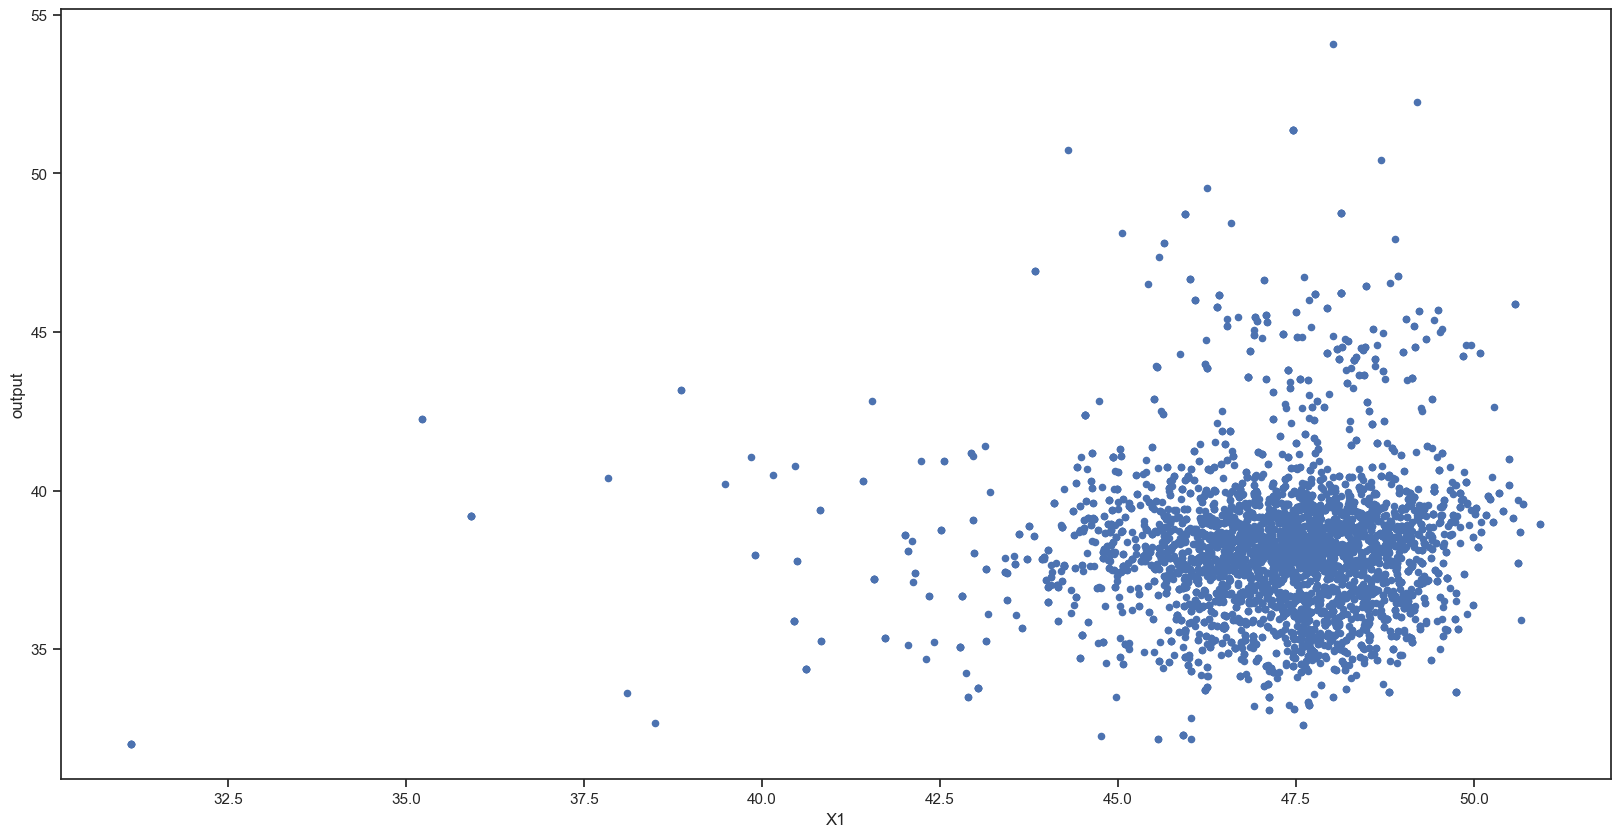

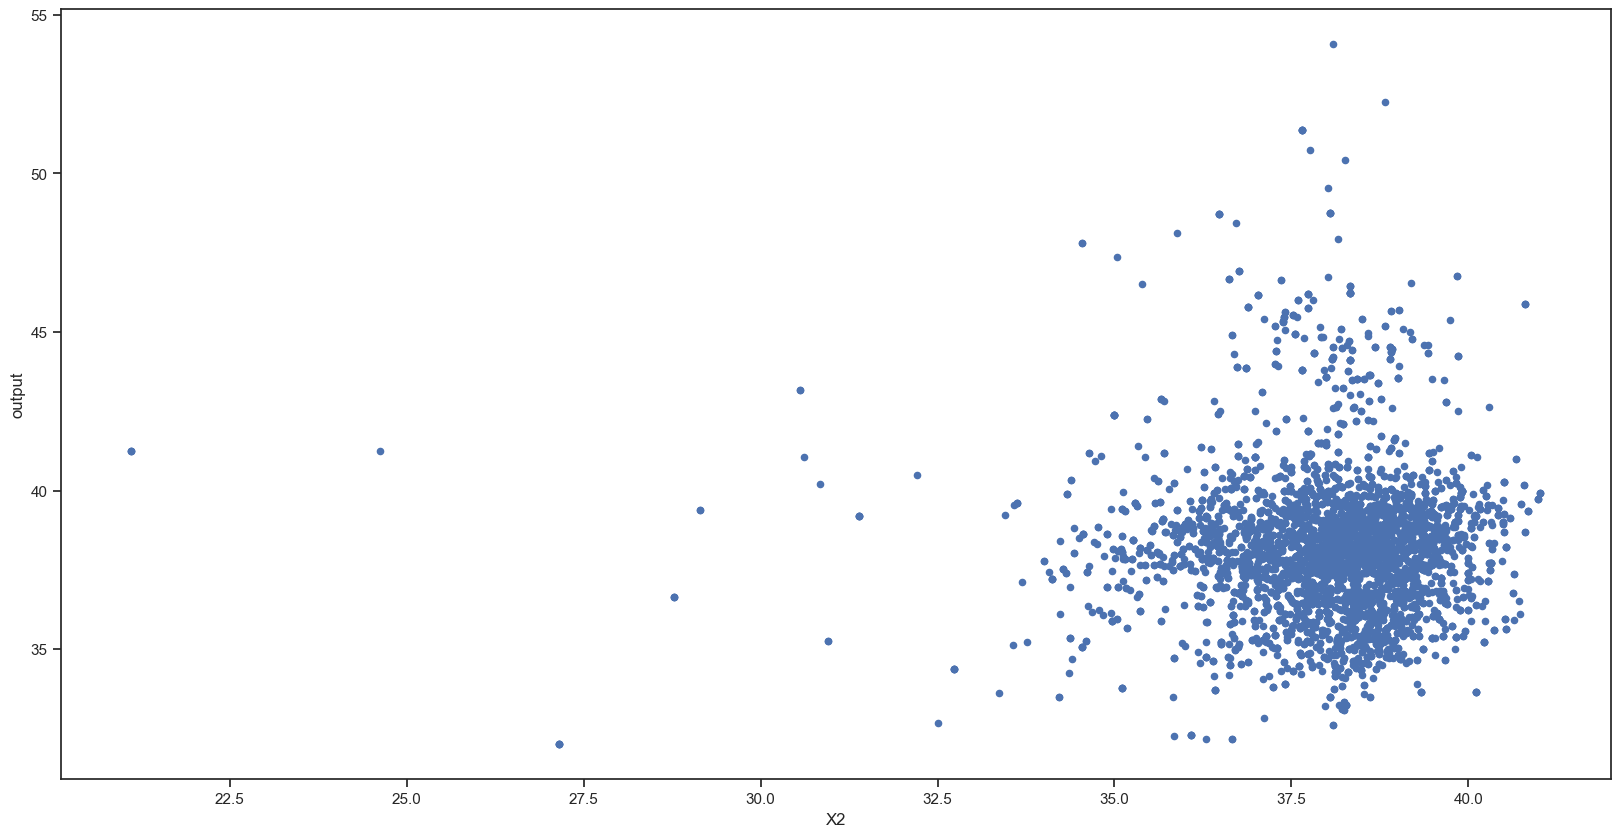

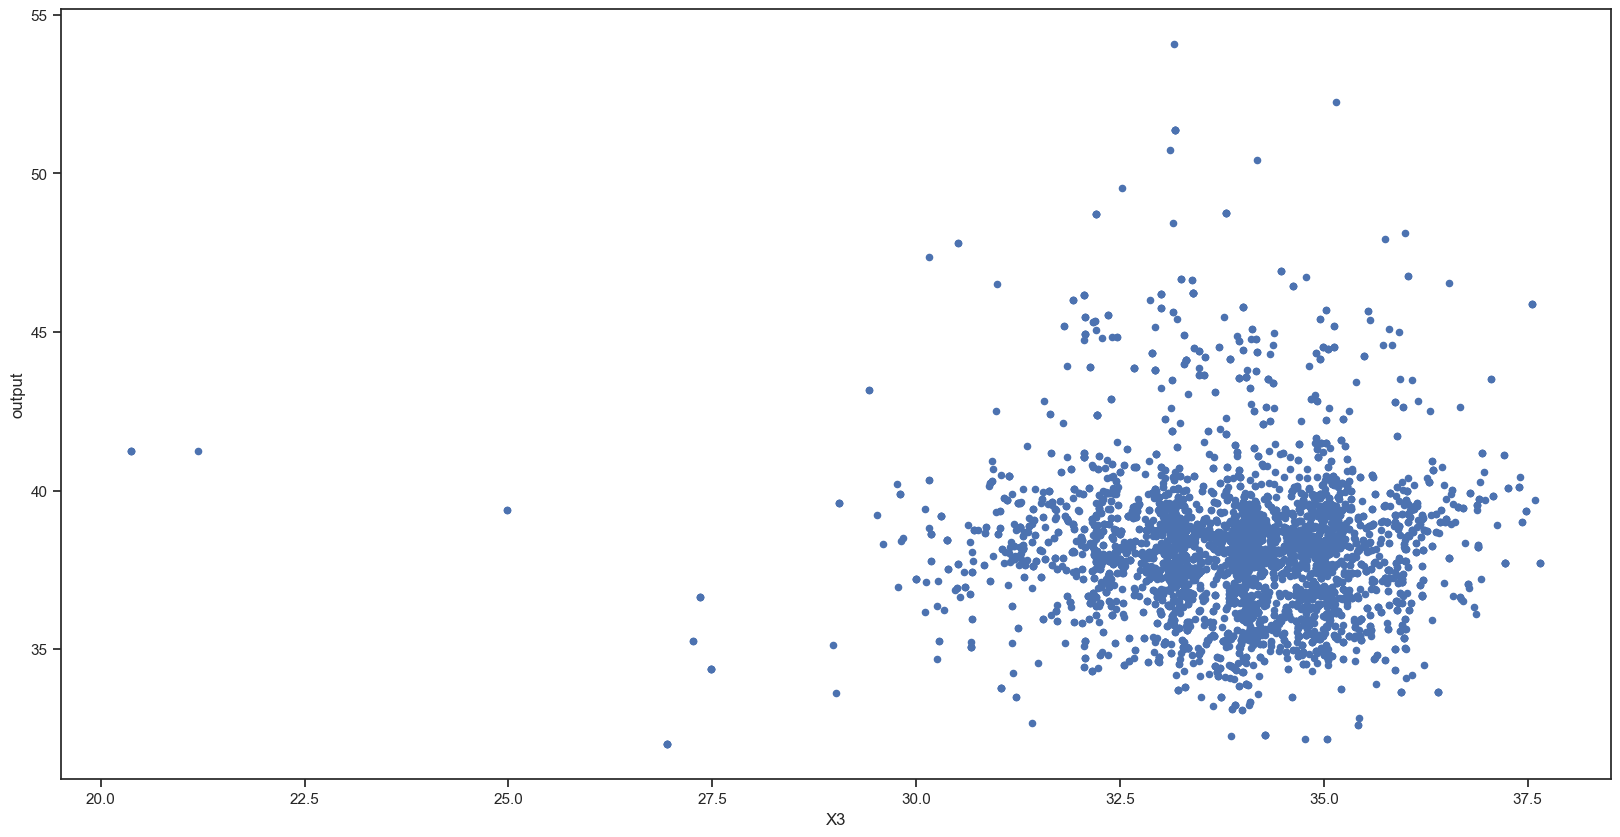

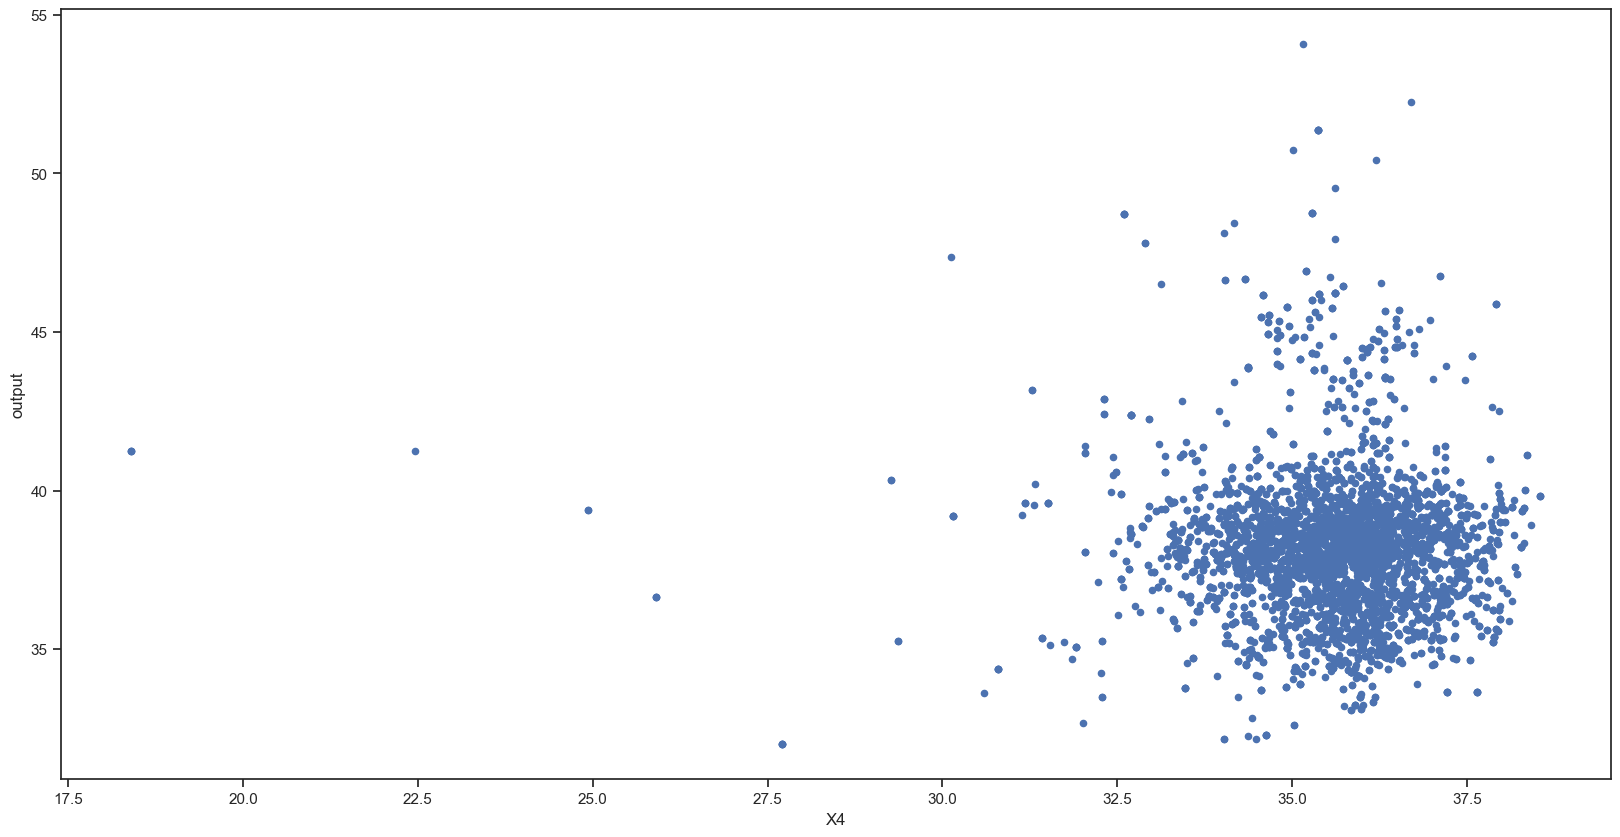

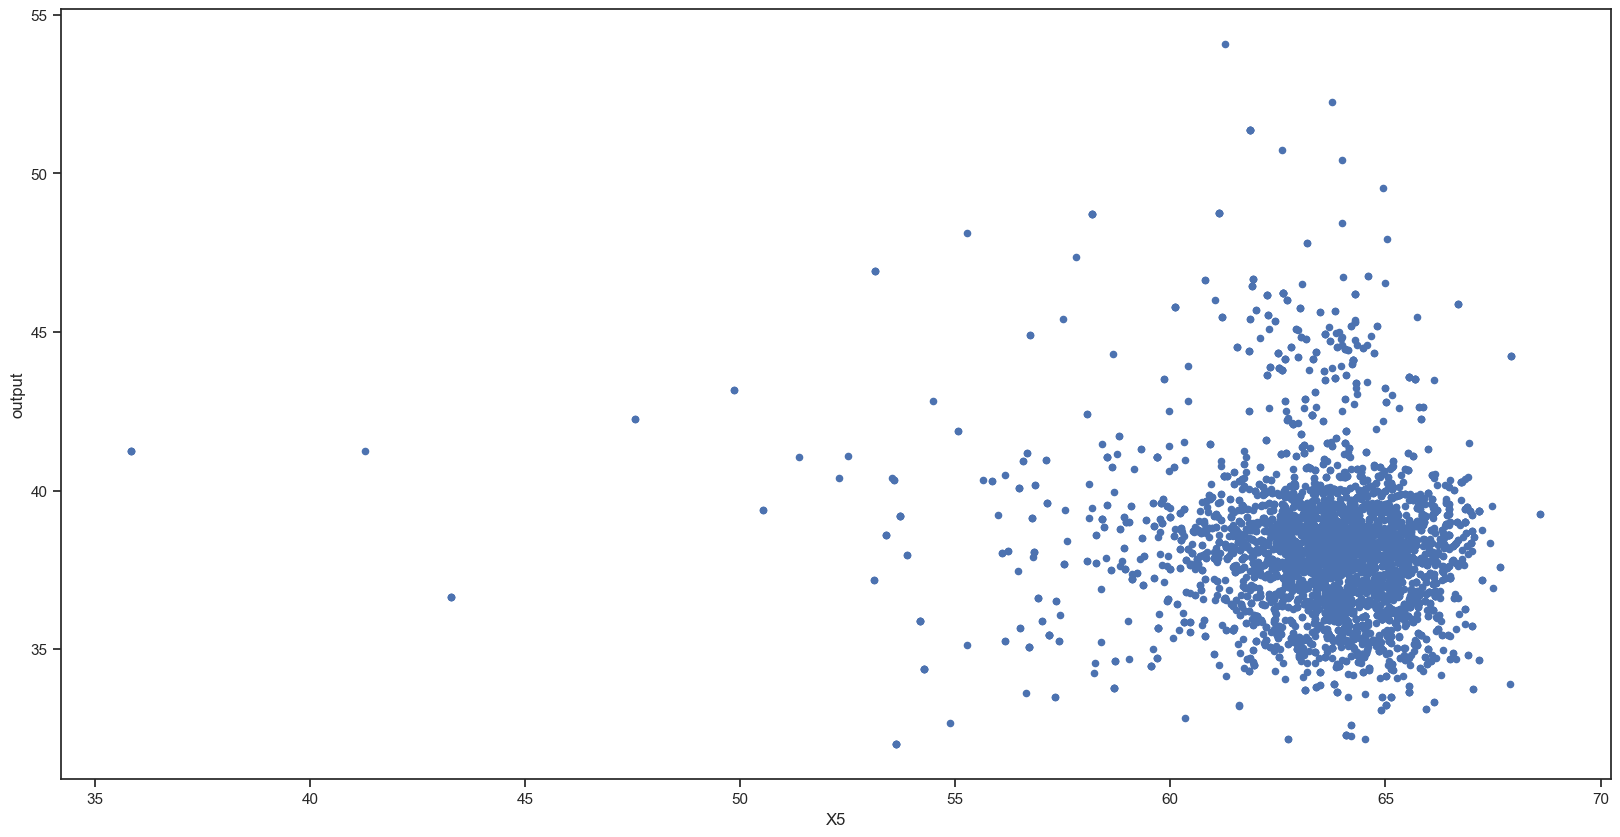

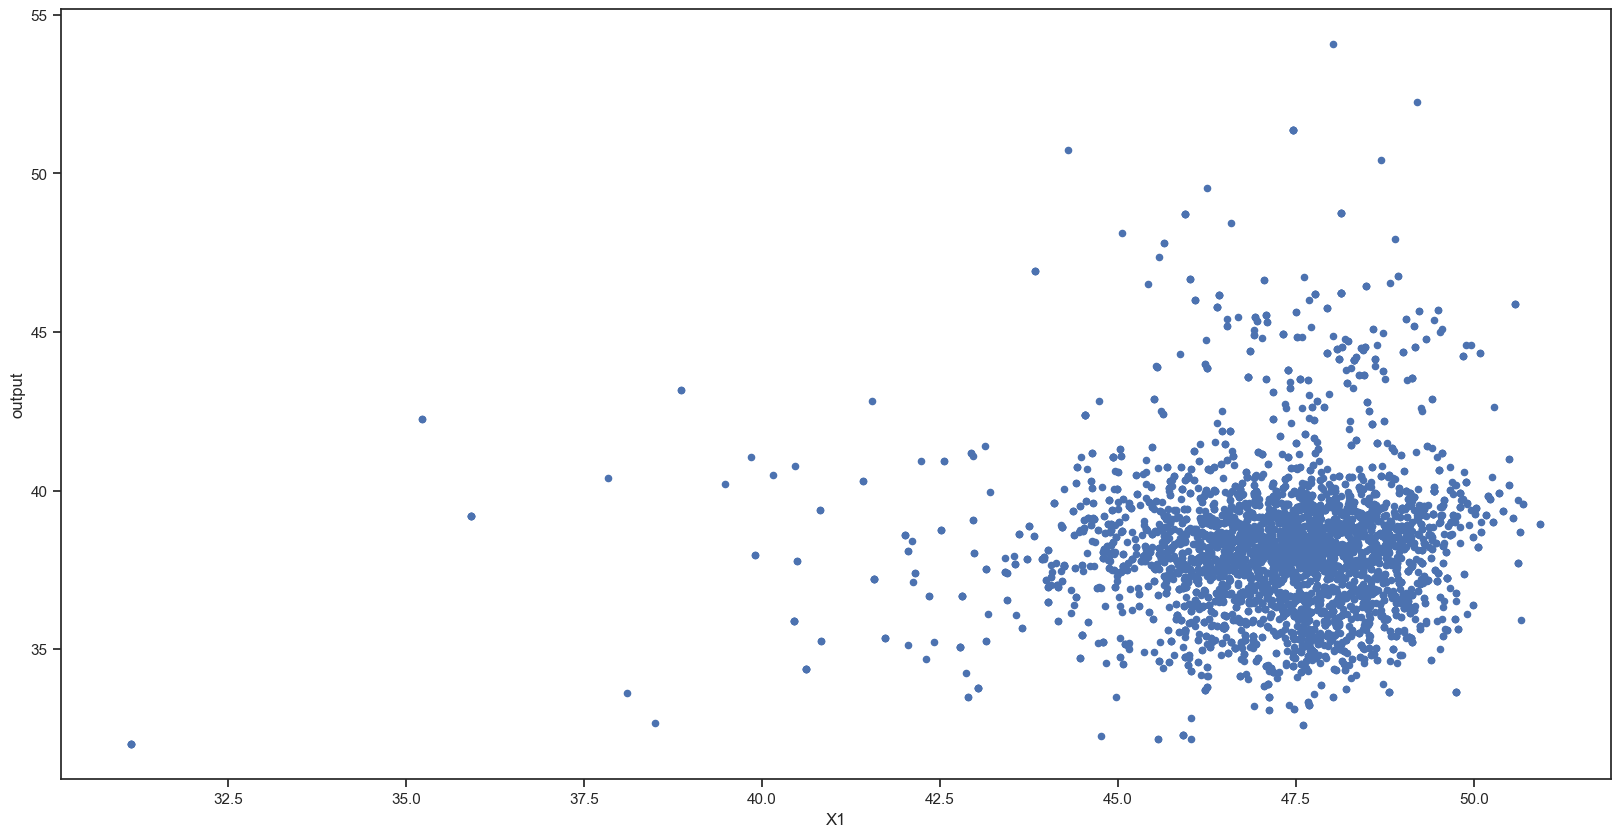

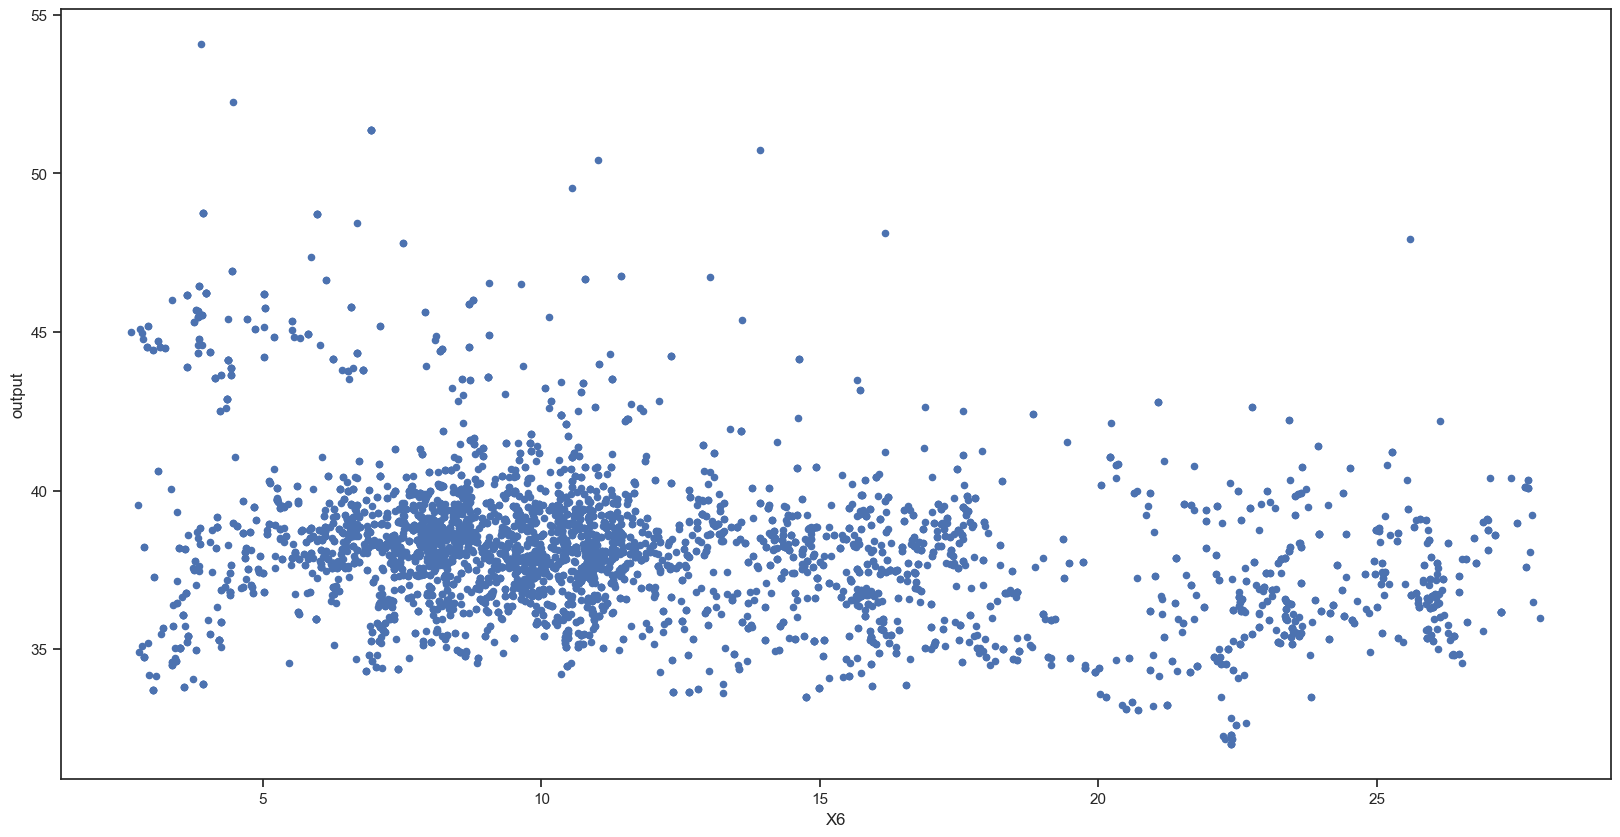

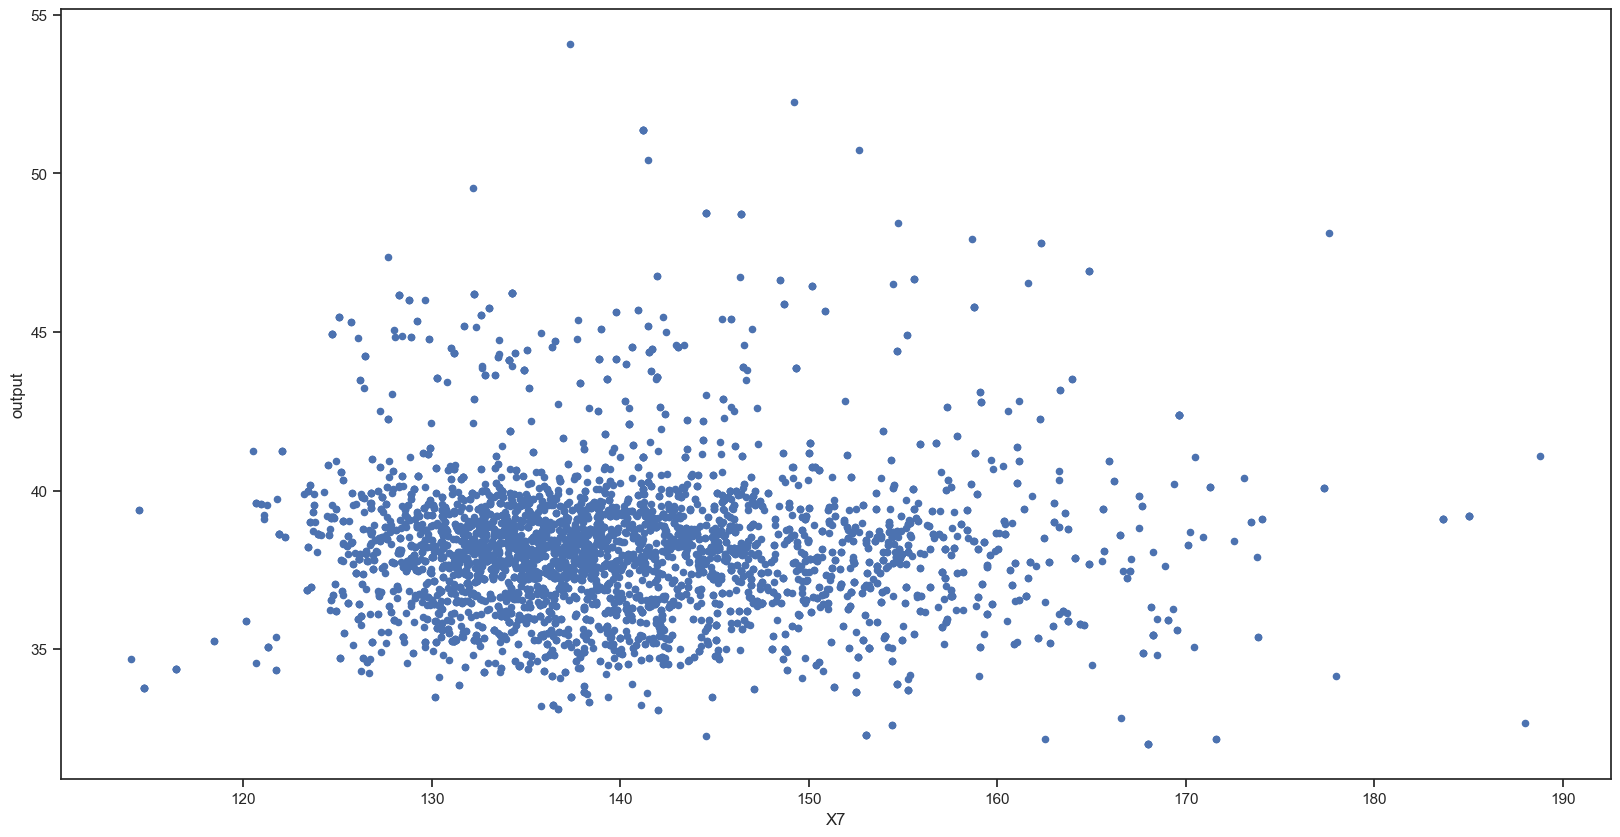

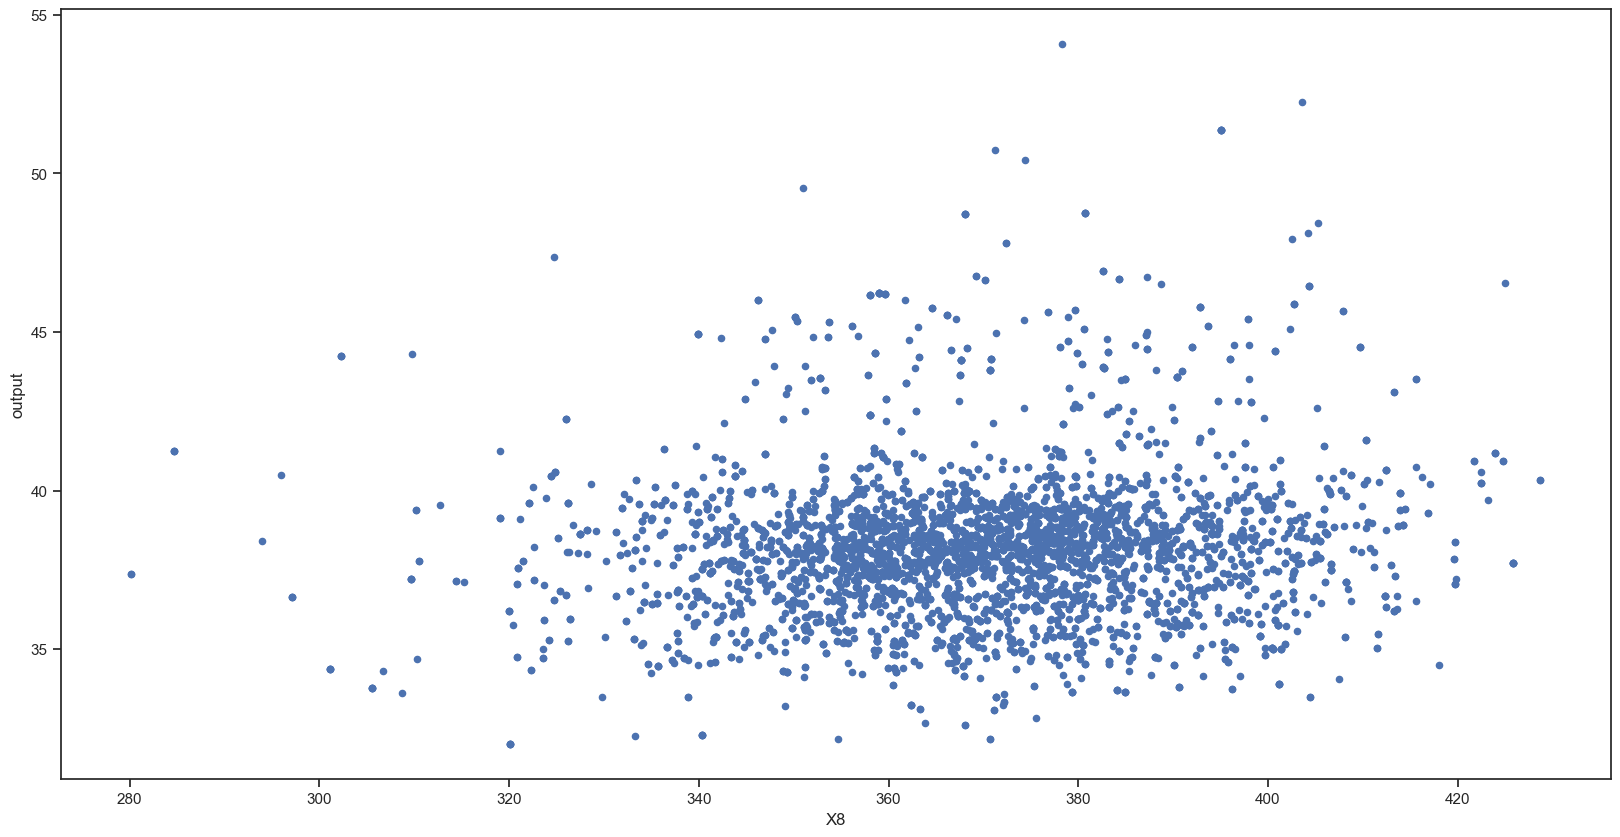

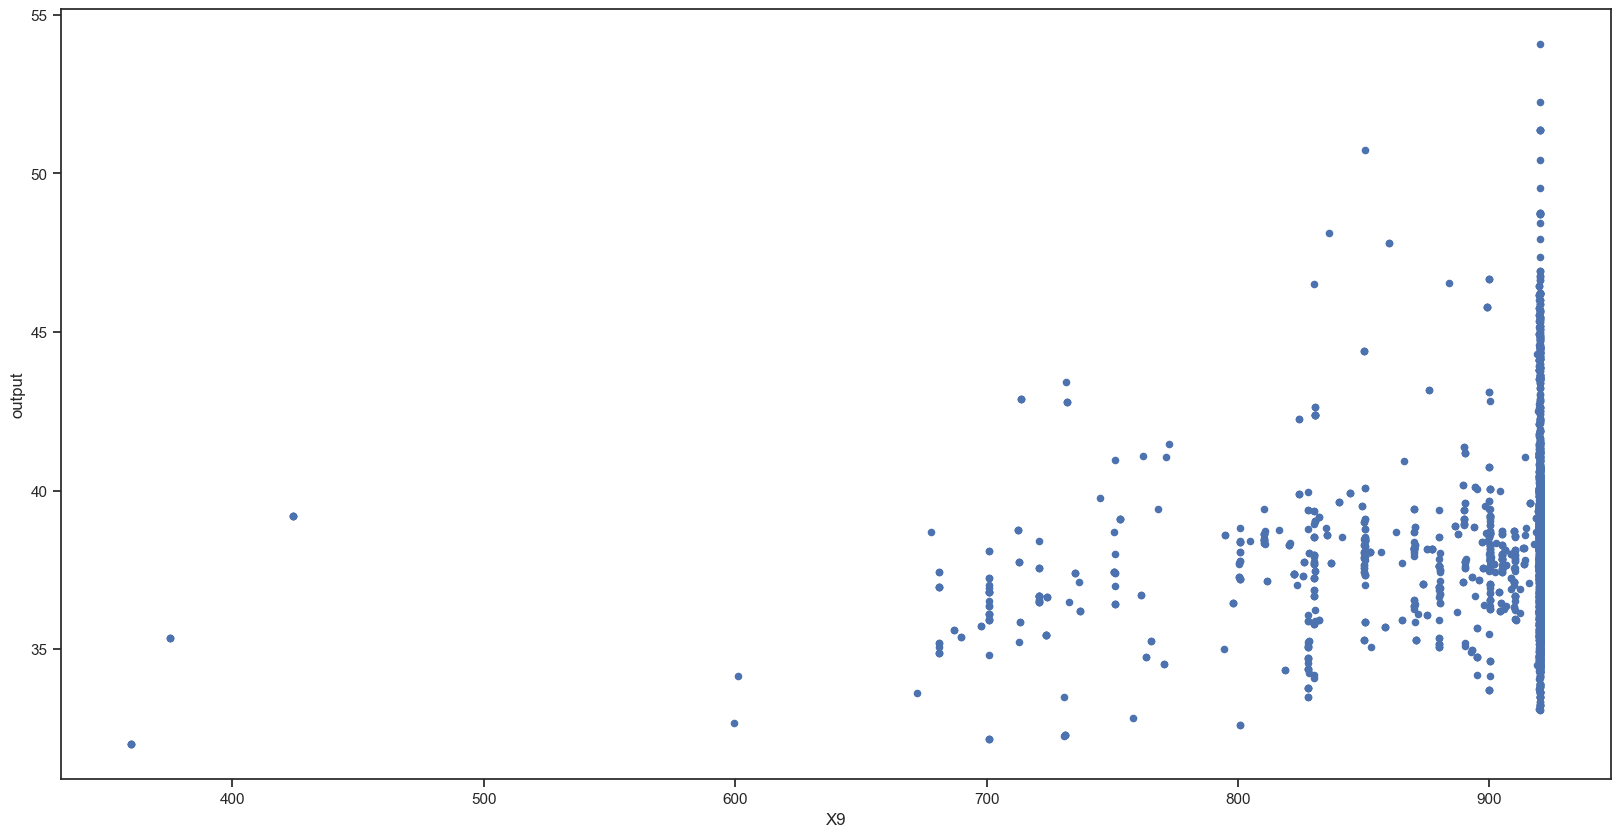

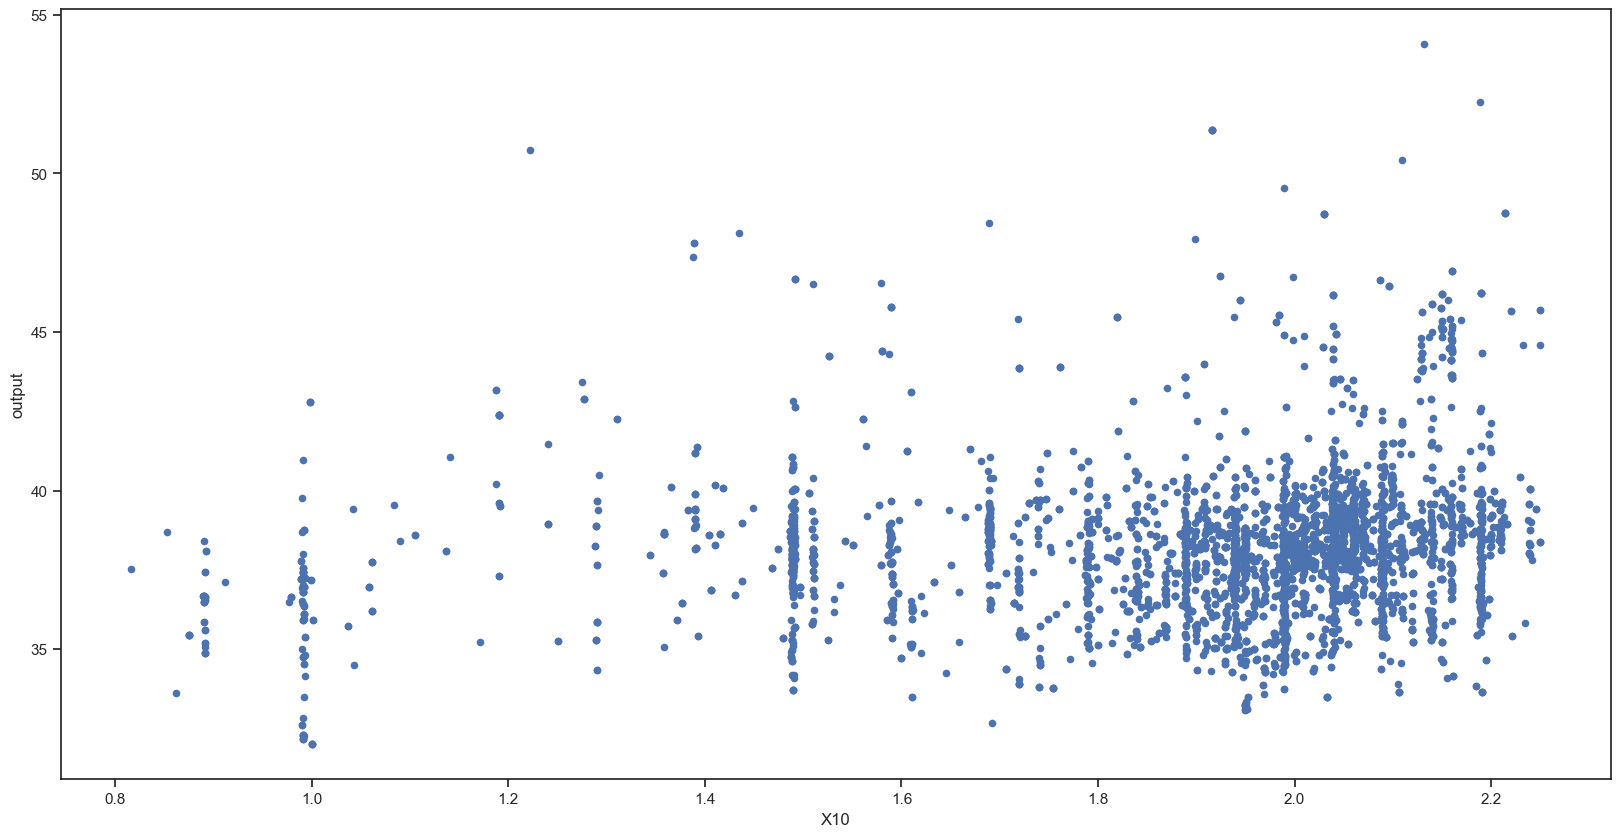

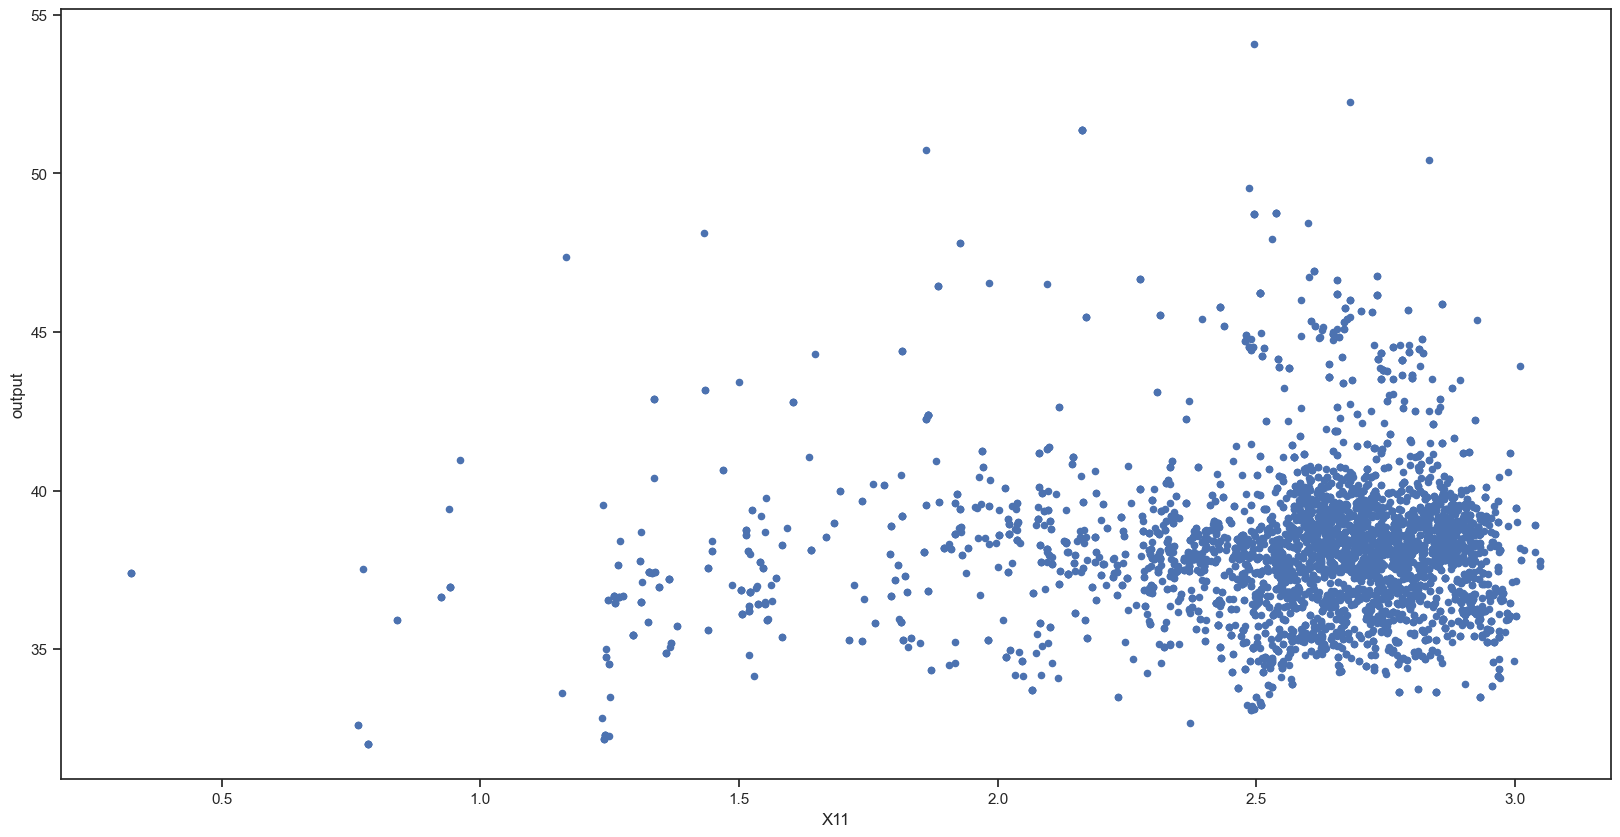

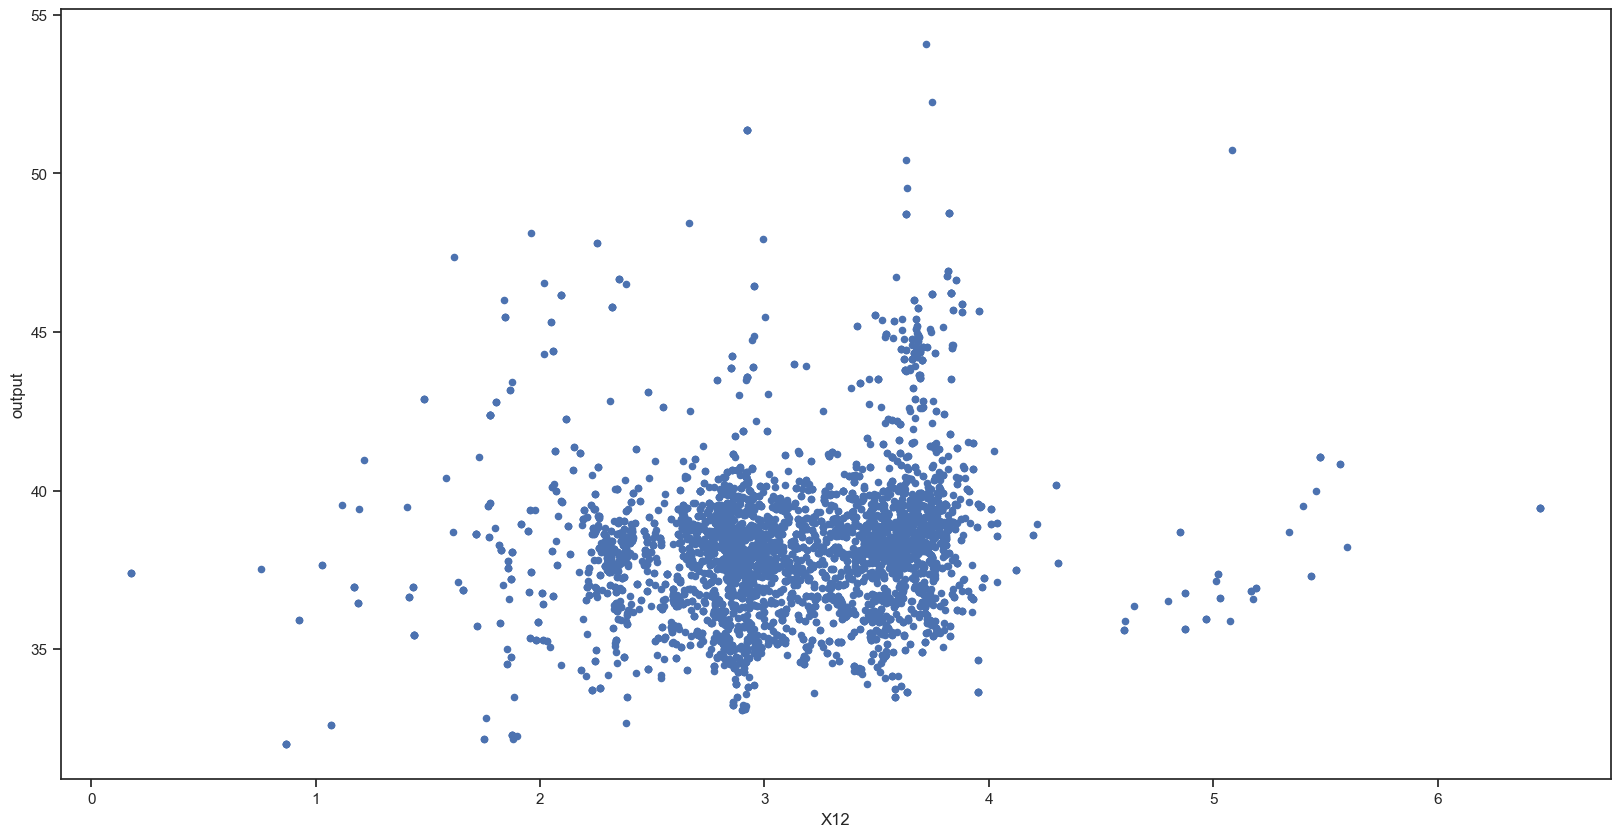

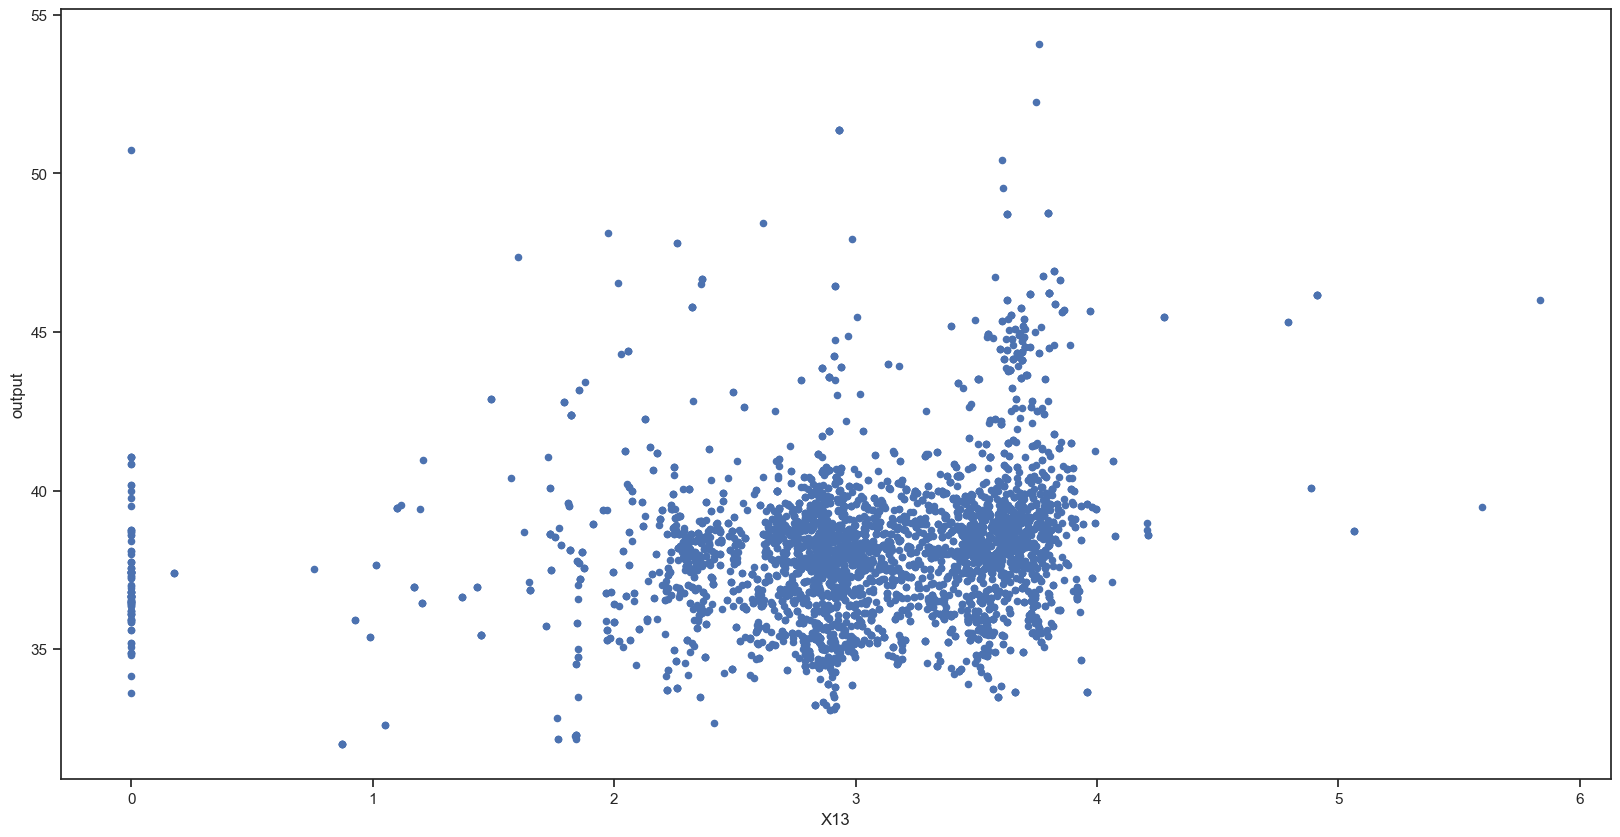

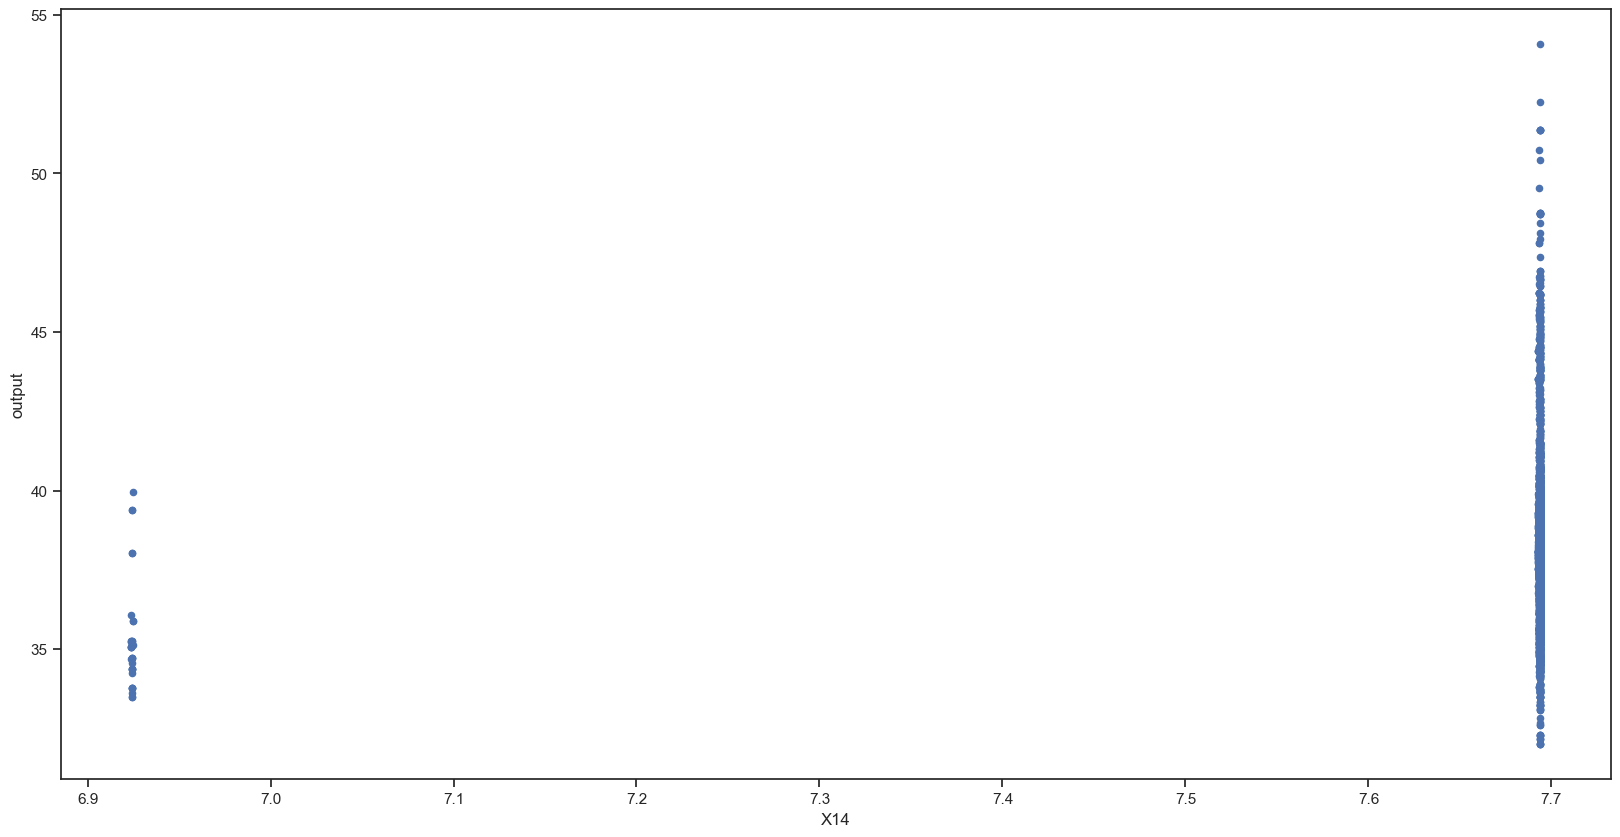

In [140]:
## Plotting scatter graph for how various factors( X1-X14) affect the output

fig, ax = plt.subplots(figsize = (20,10))

df.plot(kind = "scatter", 
            x= "X1",
            y ="output",
            ax = ax);

fig, ax = plt.subplots(figsize = (20,10))

df.plot(kind = "scatter", 
            x= "X2",
            y ="output",
            ax = ax);

fig, ax = plt.subplots(figsize = (20,10))

df.plot(kind = "scatter", 
            x= "X3",
            y ="output",
            ax = ax);

fig, ax = plt.subplots(figsize = (20,10))

df.plot(kind = "scatter", 
            x= "X4",
            y ="output",
            ax = ax);

fig, ax = plt.subplots(figsize = (20,10))

df.plot(kind = "scatter", 
            x= "X5",
            y ="output",
            ax = ax);

fig, ax = plt.subplots(figsize = (20,10))

df.plot(kind = "scatter", 
            x= "X1",
            y ="output",
            ax = ax);

fig, ax = plt.subplots(figsize = (20,10))

df.plot(kind = "scatter", 
            x= "X6",
            y ="output",
            ax = ax);

fig, ax = plt.subplots(figsize = (20,10))

df.plot(kind = "scatter", 
            x= "X7",
            y ="output",
            ax = ax);

fig, ax = plt.subplots(figsize = (20,10))

df.plot(kind = "scatter", 
            x= "X8",
            y ="output",
            ax = ax);

fig, ax = plt.subplots(figsize = (20,10))

df.plot(kind = "scatter", 
            x= "X9",
            y ="output",
            ax = ax);

fig, ax = plt.subplots(figsize = (20,10))

df.plot(kind = "scatter", 
            x= "X10",
            y ="output",
            ax = ax);

fig, ax = plt.subplots(figsize = (20,10))

df.plot(kind = "scatter", 
            x= "X11",
            y ="output",
            ax = ax);

fig, ax = plt.subplots(figsize = (20,10))

df.plot(kind = "scatter", 
            x= "X12",
            y ="output",
            ax = ax);

fig, ax = plt.subplots(figsize = (20,10))

df.plot(kind = "scatter", 
            x= "X13",
            y ="output",
            ax = ax);

fig, ax = plt.subplots(figsize = (20,10))

df.plot(kind = "scatter", 
            x= "X14",
            y ="output",
            ax = ax);

<Axes: ylabel='Frequency'>

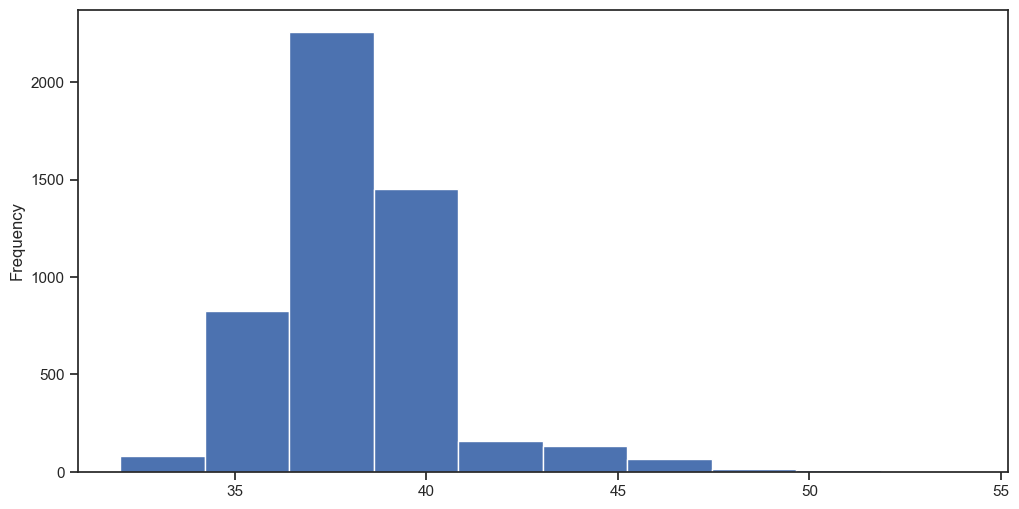

In [141]:
## Plotting histogram for the output value
df.output.plot.hist()

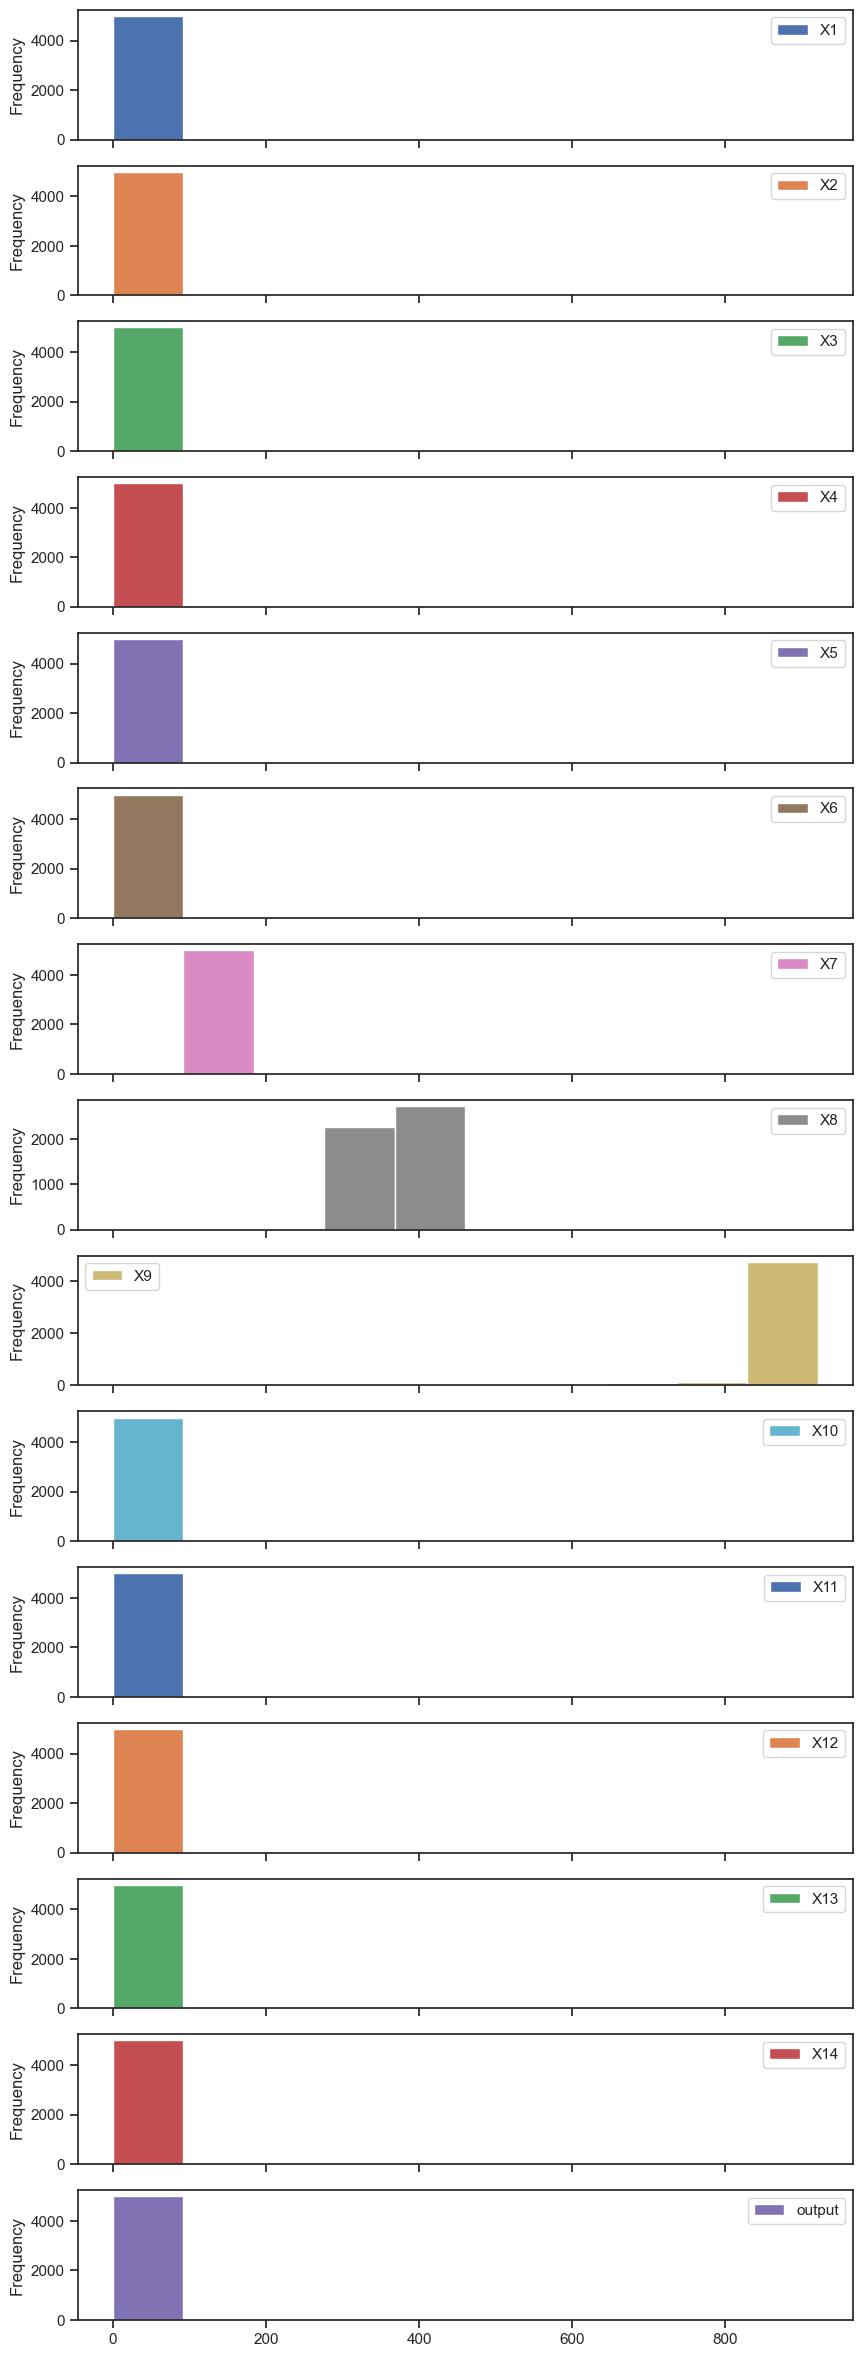

In [142]:
## Plotting histogram for the variables.
df.plot.hist(figsize = (10,30) , subplots=True);

C:\Users\lenovo\AppData\Local\Temp\ipykernel_13224\237081229.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


(15.5, -0.5)

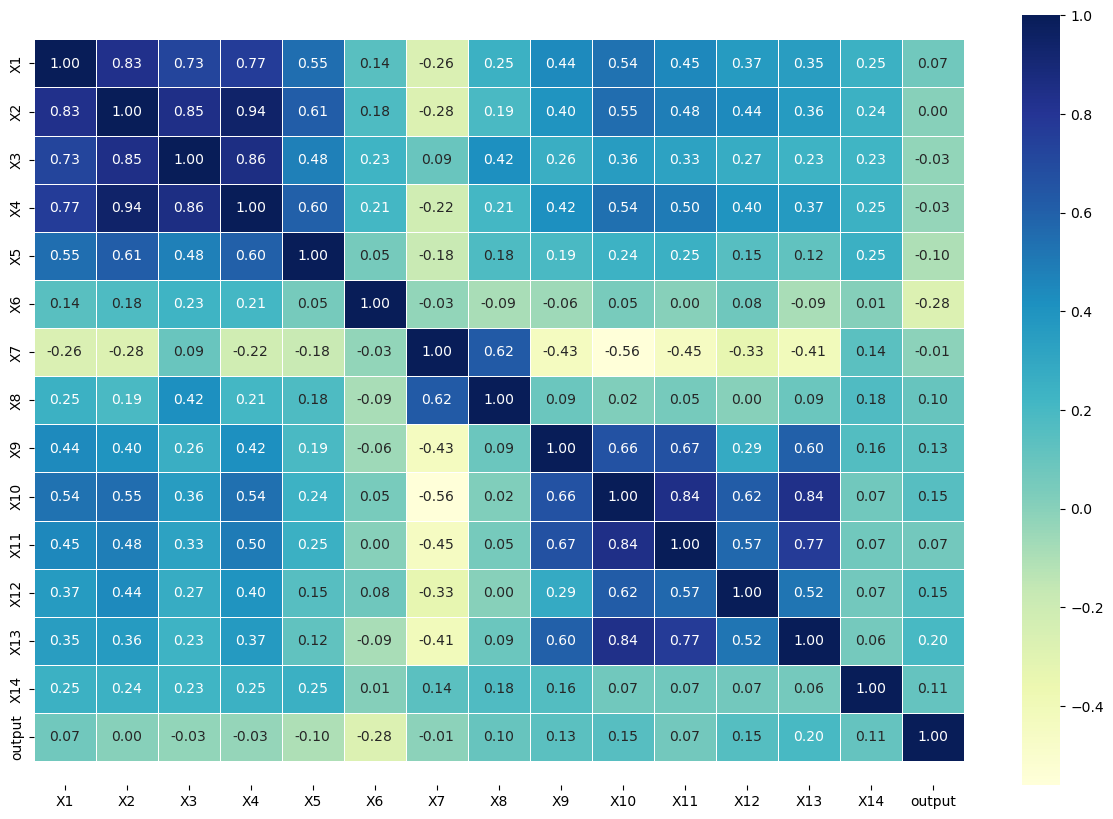

In [10]:
## Making a correlational matrix

corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

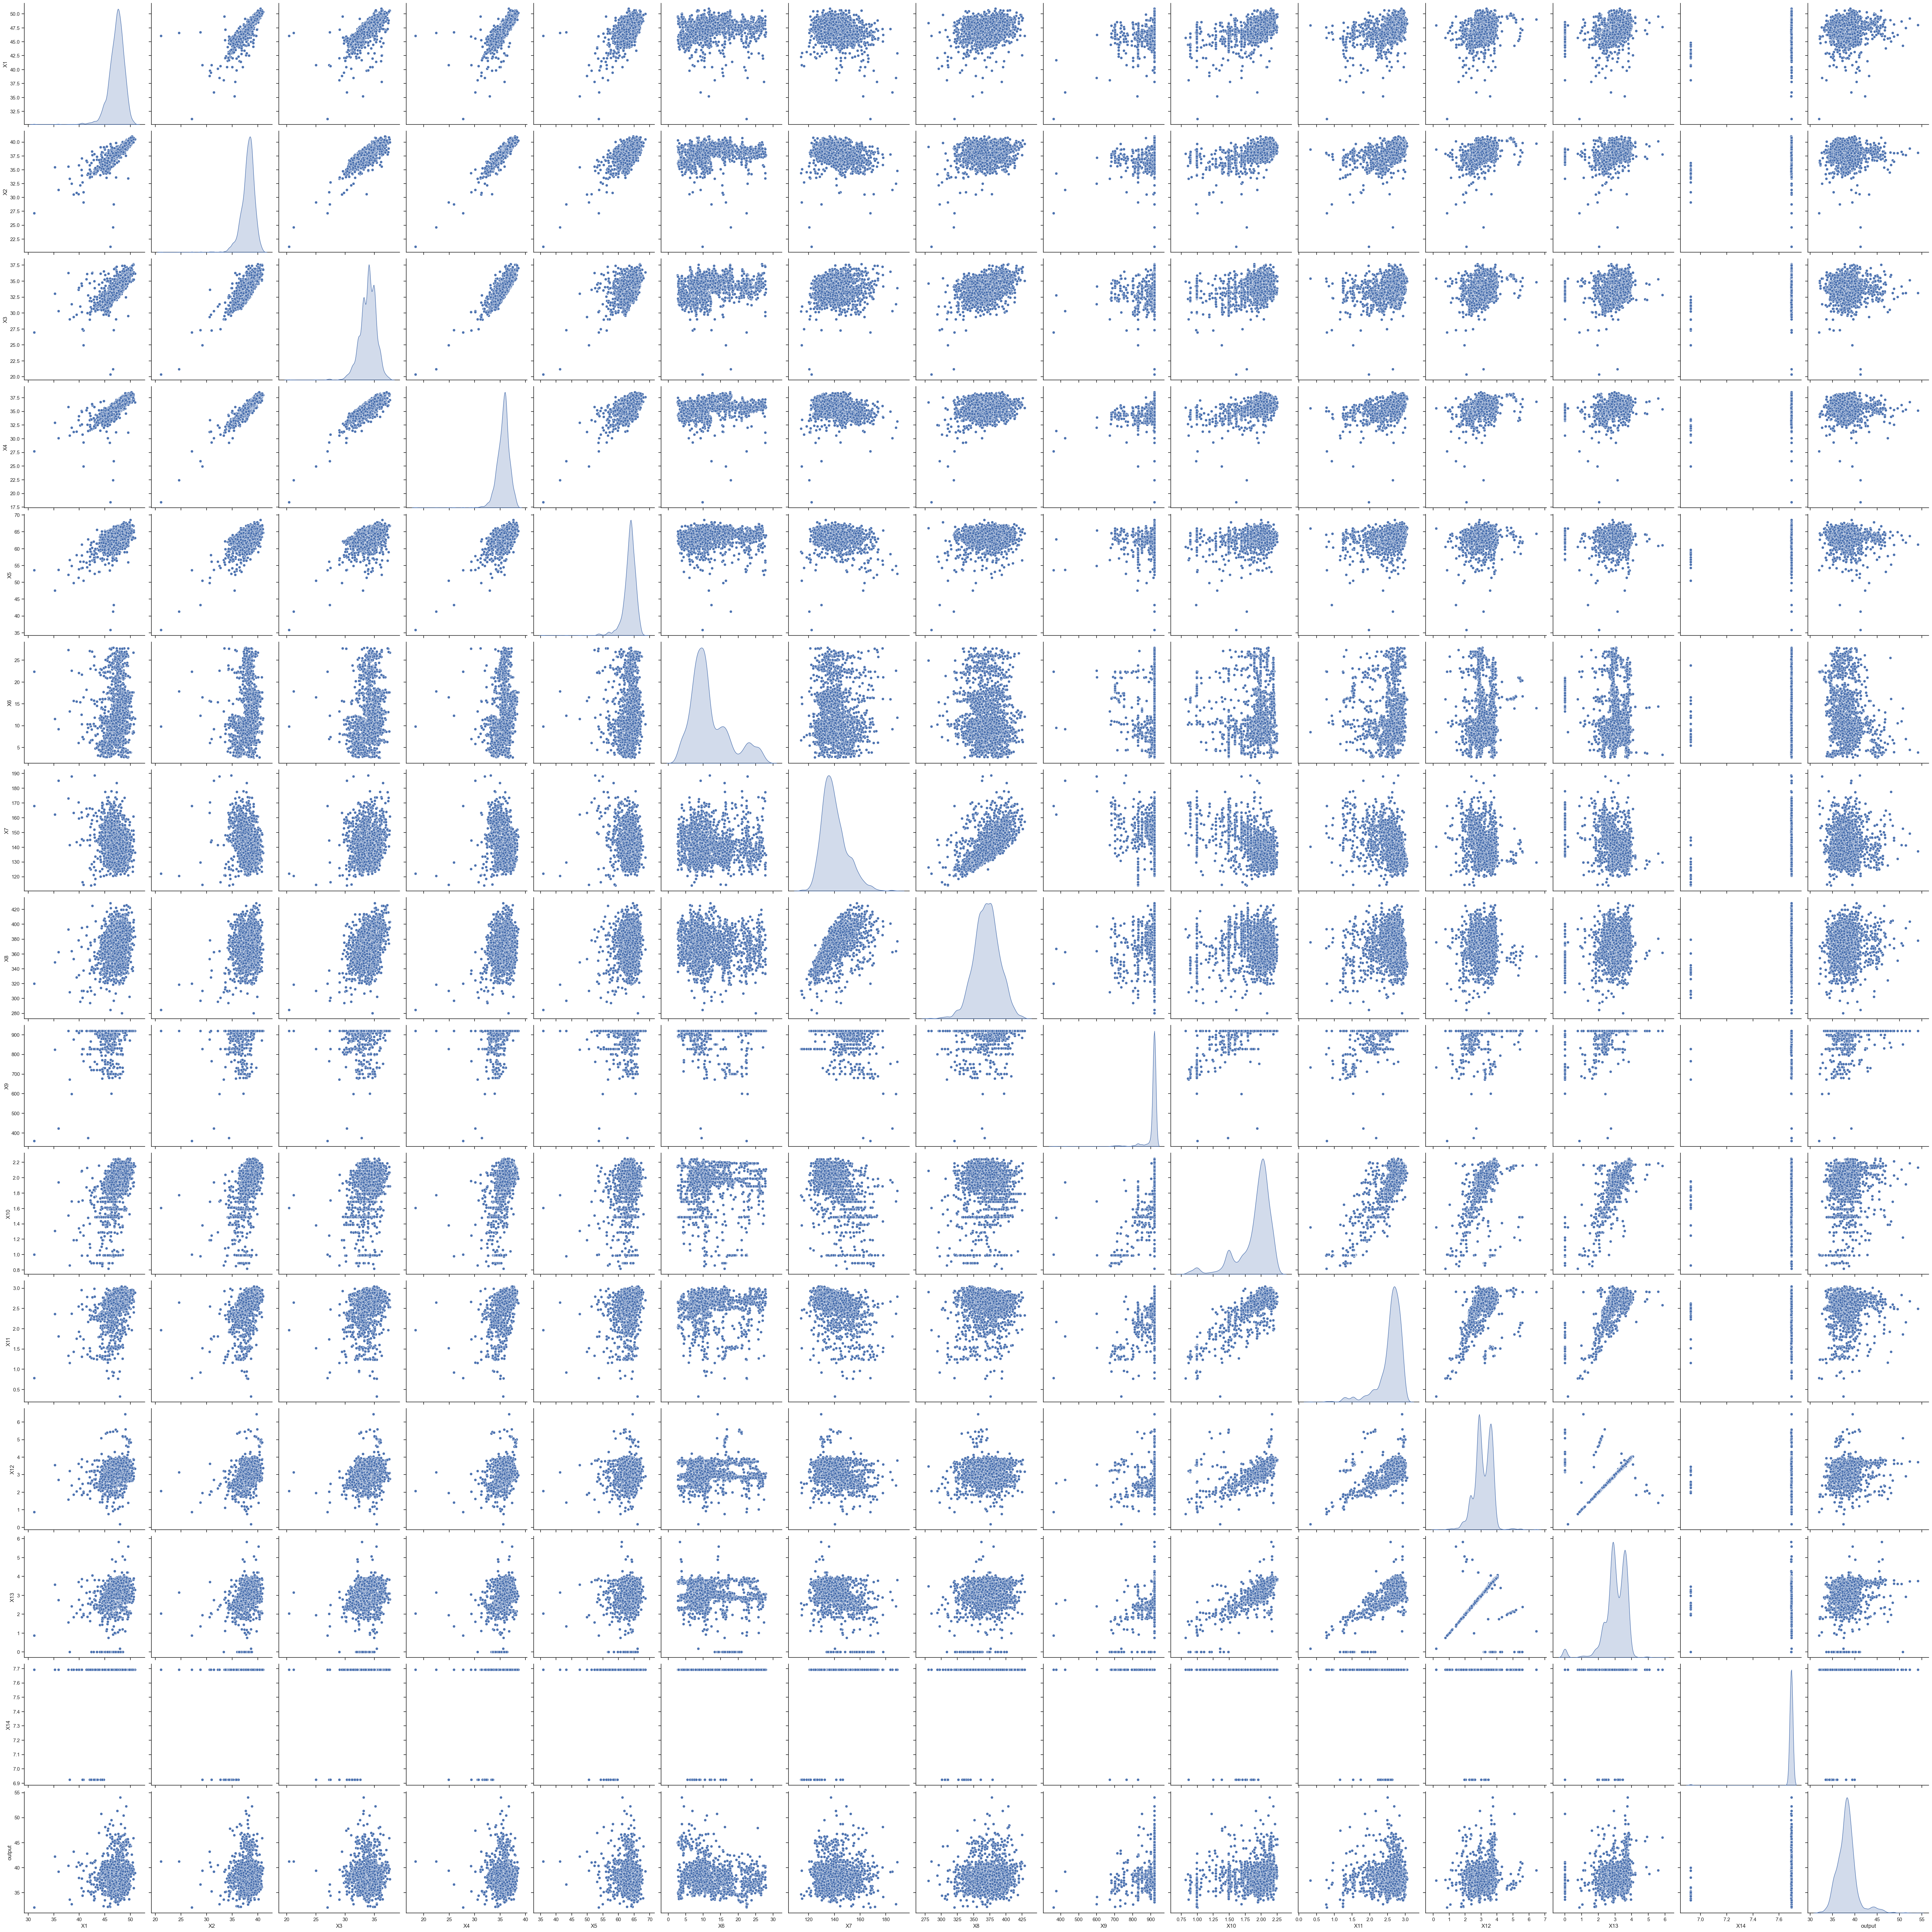

In [108]:
sns.set(style="ticks")
sns.pairplot(data=df, diag_kind='kde', height=4) 
plt.show()

In [117]:
df.head(10)

X1        X2        X3        X4        X5        X6         X7  \
0  48.65105  38.97555  35.33245  36.00630  63.58980  10.96650  145.15495   
1  46.30760  36.69085  32.61530  34.56650  62.49190  10.48560  153.96970   
2  48.56460  38.86065  34.98840  35.50790  65.73585  19.72395  161.72370   
3  47.59175  38.35315  34.27105  35.68830  64.44080  11.15725  136.59115   
4  49.20060  38.82830  35.15390  36.69245  63.76605   4.46650  149.19130   
5  46.49890  36.73950  34.69115  35.00760  60.91395   8.79055  155.91180   
6  47.99855  38.28865  34.82420  35.99750  65.20965  14.68080  146.11200   
7  47.43855  37.65615  32.84180  34.99365  63.88730  10.53805  137.60100   
8  46.90795  37.98000  33.64040  35.74190  61.58920  20.98090  135.80480   
9  48.49490  38.76725  34.26065  35.62965  63.91920  10.03325  138.84665   

          X8      X9      X10      X11     X12     X13      X14    output  
0  384.60800  919.95  2.05030  2.66385  3.5270  3.5270  7.69330  37.87175  
1  389.11030  880.05  1.59045  1.83155  1.9555  1.9835  7.69370  35.35060  
2  383.47905  712.95  1.06160  1.54015  3.5815  0.0000  7.69370  37.73035  
3  379.70615  920.05  2.04615  2.74185  3.6125  3.5880  7.69310  39.72865  
4  403.56375  919.95  2.18880  2.68110  3.7480  3.7475  7.69395  52.24655  
5  387.32905  919.85  2.09010  2.71295  3.5290  3.5425  7.69385  41.45925  
6  397.15710  919.95  1.93900  2.45890  2.8745  2.8520  7.69385  37.99530  
7  383.21620  920.05  2.05980  2.79575  3.2955  3.2715  7.69390  38.95365  
8  349.05420  920.05  1.94990  2.49175  2.9175  2.9175  7.69395  33.21110  
9  373.63455  919.95  1.83875  2.53825  2.6670  2.6865  7.69395  36.90930

In [25]:
# Import data again but this time parse dates
df = pd.read_csv("intern_data_spm.csv",
                 low_memory=False,
                 parse_dates=["CLOCK"])

In [26]:
df.CLOCK.dtype

dtype('<M8[ns]')

In [34]:
df.output[:1000]

0      37.87175
1      35.35060
2      37.73035
3      39.72865
4      52.24655
         ...   
995    35.02170
996    38.95275
997    37.48595
998    36.86260
999    38.55330
Name: output, Length: 1000, dtype: float64

In [118]:
df.head()

CLOCK        X1        X2        X3        X4        X5  \
0 2022-12-18 14:50:00  48.65105  38.97555  35.33245  36.00630  63.58980   
1 2022-12-31 12:10:00  46.30760  36.69085  32.61530  34.56650  62.49190   
2 2022-12-23 18:10:00  48.56460  38.86065  34.98840  35.50790  65.73585   
3 2022-12-19 05:30:00  47.59175  38.35315  34.27105  35.68830  64.44080   
4 2022-12-10 14:00:00  49.20060  38.82830  35.15390  36.69245  63.76605   

         X6         X7         X8      X9      X10      X11     X12     X13  \
0  10.96650  145.15495  384.60800  919.95  2.05030  2.66385  3.5270  3.5270   
1  10.48560  153.96970  389.11030  880.05  1.59045  1.83155  1.9555  1.9835   
2  19.72395  161.72370  383.47905  712.95  1.06160  1.54015  3.5815  0.0000   
3  11.15725  136.59115  379.70615  920.05  2.04615  2.74185  3.6125  3.5880   
4   4.46650  149.19130  403.56375  919.95  2.18880  2.68110  3.7480  3.7475   

       X14    output  
0  7.69330  37.87175  
1  7.69370  35.35060  
2  7.69370  37.73035  
3  7.69310  39.72865  
4  7.69395  52.24655

In [11]:
## Transpose
df.head().T

0                    1                    2  \
CLOCK   2022-12-18 14:50:00  2022-12-31 12:10:00  2022-12-23 18:10:00   
X1                 48.65105              46.3076              48.5646   
X2                 38.97555             36.69085             38.86065   
X3                 35.33245              32.6153              34.9884   
X4                  36.0063              34.5665              35.5079   
X5                  63.5898              62.4919             65.73585   
X6                  10.9665              10.4856             19.72395   
X7                145.15495             153.9697             161.7237   
X8                  384.608             389.1103            383.47905   
X9                   919.95               880.05               712.95   
X10                  2.0503              1.59045               1.0616   
X11                 2.66385              1.83155              1.54015   
X12                   3.527               1.9555               3.5815   
X13                   3.527               1.9835                  0.0   
X14                  7.6933               7.6937               7.6937   
output             37.87175              35.3506             37.73035   

                          3                    4  
CLOCK   2022-12-19 05:30:00  2022-12-10 14:00:00  
X1                 47.59175              49.2006  
X2                 38.35315              38.8283  
X3                 34.27105              35.1539  
X4                  35.6883             36.69245  
X5                  64.4408             63.76605  
X6                 11.15725               4.4665  
X7                136.59115             149.1913  
X8                379.70615            403.56375  
X9                   920.05               919.95  
X10                 2.04615               2.1888  
X11                 2.74185               2.6811  
X12                  3.6125                3.748  
X13                   3.588               3.7475  
X14                  7.6931              7.69395  
output             39.72865             52.24655

In [27]:
# Sort DataFrame in date order
df.sort_values(by=["CLOCK"], inplace=True, ascending=True)
df.CLOCK.head(20)

1703   2022-12-10 06:30:00
3094   2022-12-10 06:50:00
3443   2022-12-10 07:00:00
3156   2022-12-10 07:00:00
4089   2022-12-10 07:10:00
1324   2022-12-10 07:10:00
4961   2022-12-10 07:10:00
986    2022-12-10 07:20:00
2980   2022-12-10 07:30:00
607    2022-12-10 07:50:00
208    2022-12-10 07:50:00
1847   2022-12-10 08:00:00
3502   2022-12-10 08:00:00
835    2022-12-10 08:10:00
3878   2022-12-10 08:10:00
3451   2022-12-10 08:20:00
3981   2022-12-10 08:20:00
2142   2022-12-10 08:40:00
3896   2022-12-10 09:00:00
1255   2022-12-10 09:00:00
Name: CLOCK, dtype: datetime64[ns]

In [28]:
# Make a copy of the original DataFrame to perform edits on
df_tmp = df.copy()

In [29]:
df_tmp

CLOCK        X1        X2        X3        X4        X5  \
1703 2022-12-10 06:30:00  49.52130  39.18235  35.92655  36.67485  63.90860   
3094 2022-12-10 06:50:00  49.55760  39.07140  35.79370  36.81315  62.28685   
3443 2022-12-10 07:00:00  49.16135  38.81610  35.12745  36.48725  64.20200   
3156 2022-12-10 07:00:00  49.16135  38.81610  35.12745  36.48725  64.20200   
4089 2022-12-10 07:10:00  49.16990  38.68730  34.99150  36.50430  61.54650   
...                  ...       ...       ...       ...       ...       ...   
705  2022-12-31 23:50:00  44.53030  34.99175  32.21660  32.68920  63.28370   
1457 2022-12-31 23:50:00  44.53030  34.99175  32.21660  32.68920  63.28370   
2177 2022-12-31 23:50:00  44.53030  34.99175  32.21660  32.68920  63.28370   
77   2022-12-31 23:50:00  44.53030  34.99175  32.21660  32.68920  63.28370   
452  2022-12-31 23:50:00  44.53030  34.99175  32.21660  32.68920  63.28370   

            X6         X7         X8      X9      X10      X11     X12  \
1703   2.63820  142.41390  387.24310  920.00  2.13995  2.64885  3.7435   
3094   2.79050  146.99295  402.32190  920.05  2.15965  2.65525  3.7375   
3443   2.93795  141.47005  393.71565  920.05  2.15995  2.43785  3.6790   
3156   2.93795  141.47005  393.71565  920.05  2.15995  2.43785  3.6790   
4089   2.91875  140.64255  391.98060  920.00  2.15950  2.48510  3.6765   
...        ...        ...        ...     ...      ...      ...     ...   
705   10.35250  169.66585  358.01860  830.50  1.19080  1.86525  1.7775   
1457  10.35250  169.66585  358.01860  830.50  1.19080  1.86525  1.7775   
2177  10.35250  169.66585  358.01860  830.50  1.19080  1.86525  1.7775   
77    10.35250  169.66585  358.01860  830.50  1.19080  1.86525  1.7775   
452   10.35250  169.66585  358.01860  830.50  1.19080  1.86525  1.7775   

         X13      X14    output  
1703  3.7455  7.69370  44.98980  
3094  3.7035  7.69365  45.09090  
3443  3.6930  7.69395  45.17905  
3156  3.6930  7.69395  45.17905  
4089  3.7020  7.69375  44.54060  
...      ...      ...       ...  
705   1.8210  7.69365  42.36810  
1457  1.8210  7.69365  42.36810  
2177  1.8210  7.69365  42.36810  
77    1.8210  7.69365  42.36810  
452   1.8210  7.69365  42.36810  

[5000 rows x 16 columns]

In [32]:
df_tmp["saleYear"] = df_tmp.CLOCK.dt.year
df_tmp["saleMonth"] = df_tmp.CLOCK.dt.month
df_tmp["saleDay"] = df_tmp.CLOCK.dt.day
df_tmp["saleDayOfWeek"] = df_tmp.CLOCK.dt.dayofweek
df_tmp["saleDayOfYear"] = df_tmp.CLOCK.dt.dayofyear


In [33]:
df_tmp.head().T

1703                 3094                 3443  \
CLOCK          2022-12-10 06:30:00  2022-12-10 06:50:00  2022-12-10 07:00:00   
X1                         49.5213              49.5576             49.16135   
X2                        39.18235              39.0714              38.8161   
X3                        35.92655              35.7937             35.12745   
X4                        36.67485             36.81315             36.48725   
X5                         63.9086             62.28685               64.202   
X6                          2.6382               2.7905              2.93795   
X7                        142.4139            146.99295            141.47005   
X8                        387.2431             402.3219            393.71565   
X9                           920.0               920.05               920.05   
X10                        2.13995              2.15965              2.15995   
X11                        2.64885              2.65525              2.43785   
X12                         3.7435               3.7375                3.679   
X13                         3.7455               3.7035                3.693   
X14                         7.6937              7.69365              7.69395   
output                     44.9898              45.0909             45.17905   
saleYear                      2022                 2022                 2022   
saleMonth                       12                   12                   12   
saleDay                         10                   10                   10   
saleDayOfWeek                    5                    5                    5   
saleDayOfYear                  344                  344                  344   

                              3156                 4089  
CLOCK          2022-12-10 07:00:00  2022-12-10 07:10:00  
X1                        49.16135              49.1699  
X2                         38.8161              38.6873  
X3                        35.12745              34.9915  
X4                        36.48725              36.5043  
X5                          64.202              61.5465  
X6                         2.93795              2.91875  
X7                       141.47005            140.64255  
X8                       393.71565             391.9806  
X9                          920.05                920.0  
X10                        2.15995               2.1595  
X11                        2.43785               2.4851  
X12                          3.679               3.6765  
X13                          3.693                3.702  
X14                        7.69395              7.69375  
output                    45.17905              44.5406  
saleYear                      2022                 2022  
saleMonth                       12                   12  
saleDay                         10                   10  
saleDayOfWeek                    5                    5  
saleDayOfYear                  344                  344

In [34]:
# Now we've enriched our DataFrame with date time features, we can remove 'saledate'
df_tmp.drop("CLOCK", axis=1, inplace=True)

In [57]:
len(df_tmp)

5000

In [161]:
df_tmp.head()

X1        X2        X3        X4        X5       X6         X7  \
1703  49.52130  39.18235  35.92655  36.67485  63.90860  2.63820  142.41390   
3094  49.55760  39.07140  35.79370  36.81315  62.28685  2.79050  146.99295   
3443  49.16135  38.81610  35.12745  36.48725  64.20200  2.93795  141.47005   
3156  49.16135  38.81610  35.12745  36.48725  64.20200  2.93795  141.47005   
4089  49.16990  38.68730  34.99150  36.50430  61.54650  2.91875  140.64255   

             X8      X9      X10      X11     X12     X13      X14    output  \
1703  387.24310  920.00  2.13995  2.64885  3.7435  3.7455  7.69370  44.98980   
3094  402.32190  920.05  2.15965  2.65525  3.7375  3.7035  7.69365  45.09090   
3443  393.71565  920.05  2.15995  2.43785  3.6790  3.6930  7.69395  45.17905   
3156  393.71565  920.05  2.15995  2.43785  3.6790  3.6930  7.69395  45.17905   
4089  391.98060  920.00  2.15950  2.48510  3.6765  3.7020  7.69375  44.54060   

      saleYear  saleMonth  saleDay  saleDayOfWeek  saleDayOfYear  
1703      2022         12       10              5            344  
3094      2022         12       10              5            344  
3443      2022         12       10              5            344  
3156      2022         12       10              5            344  
4089      2022         12       10              5            344

In [59]:
df_tmp.tail()

X1        X2       X3       X4       X5       X6         X7  \
1457  44.5303  34.99175  32.2166  32.6892  63.2837  10.3525  169.66585   
77    44.5303  34.99175  32.2166  32.6892  63.2837  10.3525  169.66585   
286   44.5303  34.99175  32.2166  32.6892  63.2837  10.3525  169.66585   
705   44.5303  34.99175  32.2166  32.6892  63.2837  10.3525  169.66585   
452   44.5303  34.99175  32.2166  32.6892  63.2837  10.3525  169.66585   

            X8     X9     X10      X11     X12    X13      X14   output  \
1457  358.0186  830.5  1.1908  1.86525  1.7775  1.821  7.69365  42.3681   
77    358.0186  830.5  1.1908  1.86525  1.7775  1.821  7.69365  42.3681   
286   358.0186  830.5  1.1908  1.86525  1.7775  1.821  7.69365  42.3681   
705   358.0186  830.5  1.1908  1.86525  1.7775  1.821  7.69365  42.3681   
452   358.0186  830.5  1.1908  1.86525  1.7775  1.821  7.69365  42.3681   

      saleYear  saleMonth  saleDay  saleDayOfWeek  saleDayOfYear  
1457      2022         12       31              5            365  
77        2022         12       31              5            365  
286       2022         12       31              5            365  
705       2022         12       31              5            365  
452       2022         12       31              5            365

In [35]:
df = pd.read_csv("intern_data_spm.csv",
                 low_memory=False,
                 parse_dates=["CLOCK"])

In [36]:
df.head()

CLOCK        X1        X2        X3        X4        X5  \
0 2022-12-18 14:50:00  48.65105  38.97555  35.33245  36.00630  63.58980   
1 2022-12-31 12:10:00  46.30760  36.69085  32.61530  34.56650  62.49190   
2 2022-12-23 18:10:00  48.56460  38.86065  34.98840  35.50790  65.73585   
3 2022-12-19 05:30:00  47.59175  38.35315  34.27105  35.68830  64.44080   
4 2022-12-10 14:00:00  49.20060  38.82830  35.15390  36.69245  63.76605   

         X6         X7         X8      X9      X10      X11     X12     X13  \
0  10.96650  145.15495  384.60800  919.95  2.05030  2.66385  3.5270  3.5270   
1  10.48560  153.96970  389.11030  880.05  1.59045  1.83155  1.9555  1.9835   
2  19.72395  161.72370  383.47905  712.95  1.06160  1.54015  3.5815  0.0000   
3  11.15725  136.59115  379.70615  920.05  2.04615  2.74185  3.6125  3.5880   
4   4.46650  149.19130  403.56375  919.95  2.18880  2.68110  3.7480  3.7475   

       X14    output  
0  7.69330  37.87175  
1  7.69370  35.35060  
2  7.69370  37.73035  
3  7.69310  39.72865  
4  7.69395  52.24655

In [37]:
df.drop("CLOCK", axis=1, inplace=True)

In [184]:
df.head()

X1        X2        X3        X4        X5        X6         X7  \
0  48.65105  38.97555  35.33245  36.00630  63.58980  10.96650  145.15495   
1  46.30760  36.69085  32.61530  34.56650  62.49190  10.48560  153.96970   
2  48.56460  38.86065  34.98840  35.50790  65.73585  19.72395  161.72370   
3  47.59175  38.35315  34.27105  35.68830  64.44080  11.15725  136.59115   
4  49.20060  38.82830  35.15390  36.69245  63.76605   4.46650  149.19130   

          X8      X9      X10      X11     X12     X13      X14    output  
0  384.60800  919.95  2.05030  2.66385  3.5270  3.5270  7.69330  37.87175  
1  389.11030  880.05  1.59045  1.83155  1.9555  1.9835  7.69370  35.35060  
2  383.47905  712.95  1.06160  1.54015  3.5815  0.0000  7.69370  37.73035  
3  379.70615  920.05  2.04615  2.74185  3.6125  3.5880  7.69310  39.72865  
4  403.56375  919.95  2.18880  2.68110  3.7480  3.7475  7.69395  52.24655

In [38]:
# Import the RandomForestRegressor model class from the ensemble module
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Create the data
X = df.drop("output", axis=1)
y = df["output"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create random forest model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Check the score of the model (on the test set)
model.score(X_test, y_test)

# Make predictions
y_preds = model.predict(X_test)


In [175]:
X_train.shape, y_train.shape

((4000, 14), (4000,))

In [39]:
y_preds[:10]

array([37.39275594, 45.500883  , 38.53082243, 37.388377  , 42.3681    ,
       38.444904  , 37.4741255 , 39.186526  , 38.0294175 , 37.83666   ])

In [40]:
np.array(y_test[:10])

array([37.3305 , 45.79295, 42.7208 , 37.34135, 42.3681 , 38.4274 ,
       37.47685, 38.9505 , 38.03145, 37.8299 ])

In [41]:
y

0       37.871750
1       35.350600
2       37.730350
3       39.728650
4       52.246550
          ...    
4995    37.104800
4996    38.265500
4997    38.432150
4998    35.841333
4999    33.493600
Name: output, Length: 5000, dtype: float64

In [42]:
# Compare the predictions to the truth - finds absolute error between actual and predicted data

from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

0.4570332001361114

In [43]:
# Import the RandomForestRegressor model class from the ensemble module
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Create the data
X = df.drop("output", axis=1)
y = df["output"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create random forest model
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [44]:
model.score(X_test, y_test)

0.8129960570697139

In [45]:
y_test

1501    37.33050
2586    45.79295
2653    42.72080
1055    37.34135
705     42.36810
          ...   
4711    36.66475
2313    39.52025
3214    35.56715
2732    37.80345
1926    39.43355
Name: output, Length: 1000, dtype: float64

In [188]:
y_test.mean()

38.118134732777776

## R^2

Compares your models predictions to the mean of the targets. 

In [46]:
from sklearn.metrics import r2_score

# Fill an array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())

In [47]:
y_test_mean[:10]

array([38.11813473, 38.11813473, 38.11813473, 38.11813473, 38.11813473,
       38.11813473, 38.11813473, 38.11813473, 38.11813473, 38.11813473])

## Mean absolute error (MAE)

MAE is the average of the absolute differences between predictions and actual values.

In [48]:
# MAE

from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mae

0.4570332001361114

In [49]:
error = pd.DataFrame(data={"actual values": y_test,
                        "predicted values": y_preds})
error["differences"] = error["predicted values"] -error["actual values"]
error.head(10)

actual values  predicted values   differences
1501       37.33050         37.392756  6.225594e-02
2586       45.79295         45.500883 -2.920670e-01
2653       42.72080         38.530822 -4.189978e+00
1055       37.34135         37.388377  4.702700e-02
705        42.36810         42.368100  3.552714e-14
106        38.42740         38.444904  1.750400e-02
589        37.47685         37.474126 -2.724500e-03
2468       38.95050         39.186526  2.360260e-01
2413       38.03145         38.029417 -2.032500e-03
1600       37.82990         37.836660  6.760000e-03

In [50]:
# MAE using formulas and differences
np.abs(error["differences"]).mean()

0.4570332001361114

In [125]:
df.head()

CLOCK        X1        X2        X3        X4        X5  \
1703 2022-12-10 06:30:00  49.52130  39.18235  35.92655  36.67485  63.90860   
3094 2022-12-10 06:50:00  49.55760  39.07140  35.79370  36.81315  62.28685   
3443 2022-12-10 07:00:00  49.16135  38.81610  35.12745  36.48725  64.20200   
3156 2022-12-10 07:00:00  49.16135  38.81610  35.12745  36.48725  64.20200   
4089 2022-12-10 07:10:00  49.16990  38.68730  34.99150  36.50430  61.54650   

           X6         X7         X8      X9      X10      X11     X12     X13  \
1703  2.63820  142.41390  387.24310  920.00  2.13995  2.64885  3.7435  3.7455   
3094  2.79050  146.99295  402.32190  920.05  2.15965  2.65525  3.7375  3.7035   
3443  2.93795  141.47005  393.71565  920.05  2.15995  2.43785  3.6790  3.6930   
3156  2.93795  141.47005  393.71565  920.05  2.15995  2.43785  3.6790  3.6930   
4089  2.91875  140.64255  391.98060  920.00  2.15950  2.48510  3.6765  3.7020   

          X14    output  
1703  7.69370  44.98980  
3094  7.69365  45.09090  
3443  7.69395  45.17905  
3156  7.69395  45.17905  
4089  7.69375  44.54060

## Mean squared error (MSE)
MSE is the mean of the square of the errors between actual and predicted values.

In [52]:
# Mean squared error
from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
mse

0.9113774549537739

In [67]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

# Create X & y
X = df.drop("output", axis=1)
y = df["output"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create model
model = RandomForestRegressor()

# Fit model
model.fit(X_train, y_train)

# Make predictions
y_preds = model.predict(X_test)

# Evaluate model using evaluation functions
print("Regression metrics on the test set")
print(f"R2 score: {r2_score(y_test, y_preds)}")
print(f"MAE: {mean_absolute_error(y_test, y_preds)}")
print(f"MSE: {mean_squared_error(y_test, y_preds)}")

Regression metrics on the test set
R2 score: 0.8129960570697139
MAE: 0.4570332001361114
MSE: 0.9113774549537739


## Hyperparameter tuning with RandomizedSearchCV

In [71]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

# Different RandomForestRegressor hyperparameters
rf_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"],
           "max_samples": [3200]}  # Set max_samples to the number of training samples

# Instantiate RandomizedSearchCV model
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1, random_state=42),
                              param_distributions=rf_grid,
                              n_iter=2,
                              cv=5,
                              verbose=True)

# Fit the RandomizedSearchCV model
rs_model.fit(X_train, y_train)


Fitting 5 folds for each of 2 candidates, totalling 10 fits


C:\Users\lenovo\Desktop\sample_project_1\env\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
5 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\lenovo\Desktop\sample_project_1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lenovo\Desktop\sample_project_1\env\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\lenovo\Desktop\sample_project_1\env\lib\site-packages\sklearn\base.py", line 637, in _validate_params
    valid

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=2,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [3200],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [72]:
# Find the best model hyperparameters
rs_model.best_params_

{'n_estimators': 30,
 'min_samples_split': 18,
 'min_samples_leaf': 7,
 'max_samples': 3200,
 'max_features': 0.5,
 'max_depth': 5}

In [74]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def show_scores(model):
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Mean Absolute Error: {mae}")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared (R2) Score: {r2}")


In [78]:
show_scores(rs_model)


Mean Absolute Error: 1.2070834611245642
Mean Squared Error: 2.8745013460969795
R-squared (R2) Score: 0.41018610592488836


## Train a model with the best hyperparamters

In [92]:
%%time

# Most ideal hyperparamters
ideal_model = RandomForestRegressor(n_estimators=30,
                                    min_samples_leaf=7,
                                    min_samples_split=18,
                                    max_features=0.5,
                                    n_jobs=-1,
                                    max_samples=3200,
                                    random_state=42) # random state so our results are reproducible

# Fit the ideal model
ideal_model.fit(X_train, y_train)

CPU times: total: 766 ms
Wall time: 166 ms


RandomForestRegressor(max_features=0.5, max_samples=3200, min_samples_leaf=7,
                      min_samples_split=18, n_estimators=30, n_jobs=-1,
                      random_state=42)

In [96]:
ideal_model.score(X_test, y_test)

0.6743552876039264

In [80]:
# Scores for ideal_model (trained on all the data)
show_scores(ideal_model)

Mean Absolute Error: 0.7978212453047754
Mean Squared Error: 1.5870534308109596
R-squared (R2) Score: 0.6743552876039263


In [82]:
# Scores on rs_model
show_scores(rs_model)

Mean Absolute Error: 1.2070834611245642
Mean Squared Error: 2.8745013460969804
R-squared (R2) Score: 0.41018610592488813


In [87]:
# Import the test data
df_test = pd.read_csv("intern_data_spm.csv",
                      low_memory=False,
                      parse_dates=["CLOCK"])

df_test.head()

CLOCK        X1        X2        X3        X4        X5  \
0 2022-12-18 14:50:00  48.65105  38.97555  35.33245  36.00630  63.58980   
1 2022-12-31 12:10:00  46.30760  36.69085  32.61530  34.56650  62.49190   
2 2022-12-23 18:10:00  48.56460  38.86065  34.98840  35.50790  65.73585   
3 2022-12-19 05:30:00  47.59175  38.35315  34.27105  35.68830  64.44080   
4 2022-12-10 14:00:00  49.20060  38.82830  35.15390  36.69245  63.76605   

         X6         X7         X8      X9      X10      X11     X12     X13  \
0  10.96650  145.15495  384.60800  919.95  2.05030  2.66385  3.5270  3.5270   
1  10.48560  153.96970  389.11030  880.05  1.59045  1.83155  1.9555  1.9835   
2  19.72395  161.72370  383.47905  712.95  1.06160  1.54015  3.5815  0.0000   
3  11.15725  136.59115  379.70615  920.05  2.04615  2.74185  3.6125  3.5880   
4   4.46650  149.19130  403.56375  919.95  2.18880  2.68110  3.7480  3.7475   

       X14    output  
0  7.69330  37.87175  
1  7.69370  35.35060  
2  7.69370  37.73035  
3  7.69310  39.72865  
4  7.69395  52.24655

In [89]:
# Import the RandomForestRegressor model class from the ensemble module
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Create the data
X = df.drop("output", axis=1)
y = df["output"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create random forest model
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [143]:
model.score(X_test, y_test)

0.8129960570697139

In [145]:
## Splits the data set in 5 different training and test sets
cross_val_score(model, X, y, cv=10)

array([0.81062275, 0.88741782, 0.74341835, 0.86730406, 0.85779961,
       0.82441815, 0.86445956, 0.85488556, 0.84177368, 0.80671109])

In [146]:
np.random.seed(42)

# Single training and test split score
model_single_score = model.score(X_test, y_test)

# Take the mean of 10-fold cross-validation score
model_cross_val_score = np.mean(cross_val_score(model, X, y, cv=10))

# Compare the two
model_single_score, model_cross_val_score

(0.8129960570697139, 0.8402684729034077)

In [152]:
# Cross-validated accuracy
print(f"The cross-validated accuracy is: {np.mean(model_cross_val_score)*100:.2f}%")

The cross-validated accuracy is: 84.03%
